# Integrating Power BI in Jupyter Notebook

In [1]:
### Run top 5 cells to visualize integrated PowerBI Report in Jupyter notebook cell 5  ||  AFTER GOING THROUGH EVERYTHING
# pip install powerbiclient 

In [2]:
#import libraries
from powerbiclient import Report, models, authentication
from powerbiclient.authentication import InteractiveLoginAuthentication

In [3]:
# Authenticate to Power BI service using InteractiveLoginAuthentication
auth = authentication.InteractiveLoginAuthentication()

A local browser window will open for interactive sign in.

Interactive authentication successfully completed.
You are now logged in.

The result should be passed only to trusted code in your notebook.


In [4]:
# Define group ID and report ID
group_id = "8241a573-f3bd-4f1f-83a5-c818dbe13cdf"
report_id = "fb1a702c-e720-48a2-a6e5-f1c9f22652b9"

# Power BI report object
report = Report(group_id=group_id, report_id=report_id, auth=auth)

In [5]:
report

Report()

UnboundLocalError: cannot access local variable 'access_token' where it is not associated with a value

# Data cleaning and preprocessing

In [6]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [7]:
# 'visits.xlsx' file containing the 'Visits' data from PowerBI
file_path = 'C://Users//Jay Patel//Desktop//Canadian Shield Assesment//PowerBI Tables//Visits.xlsx'

# Load the 'Visits' data into a DataFrame
visits_df = pd.read_excel(file_path)

# Make sure 'Visit Start Date' is in datetime format
visits_df['Visit Start Date'] = pd.to_datetime(visits_df['Visit Start Date'])

# Set 'Visit Start Date' as the index
visits_df.set_index('Visit Start Date', inplace=True)

# Overview of the DataFrame
print(visits_df.head())

                              Visit_Id    Visit Start Time  \
Visit Start Date                                             
1970-01-01 00:27:44.582400  VIS1463372 2022-10-01 10:35:00   
1970-01-01 00:27:44.582400  VIS1483733 2022-10-01 10:20:00   
1970-01-01 00:27:44.582400  VIS1549278 2022-10-01 10:15:00   
1970-01-01 00:27:44.582400  VIS1553335 2022-10-01 10:35:00   
1970-01-01 00:27:44.582400  VIS1563166 2022-10-01 10:45:00   

                                       Visit End Date      Visit End Time  \
Visit Start Date                                                            
1970-01-01 00:27:44.582400  Saturday, October 1, 2022 2022-10-01 11:05:00   
1970-01-01 00:27:44.582400  Saturday, October 1, 2022 2022-10-01 10:50:00   
1970-01-01 00:27:44.582400  Saturday, October 1, 2022 2022-10-01 10:45:00   
1970-01-01 00:27:44.582400  Saturday, October 1, 2022 2022-10-01 11:05:00   
1970-01-01 00:27:44.582400  Saturday, October 1, 2022 2022-10-01 11:15:00   

                         

In [8]:
# Make sure 'Visit Start Date' is in datetime format
visits_df['Visit Start Time'] = pd.to_datetime(visits_df['Visit Start Time'])

# Set 'Visit Start Date' as the index
visits_df.set_index('Visit Start Time', inplace=True)

# Overview of the DataFrame
print(visits_df.head())

                       Visit_Id             Visit End Date  \
Visit Start Time                                             
2022-10-01 10:35:00  VIS1463372  Saturday, October 1, 2022   
2022-10-01 10:20:00  VIS1483733  Saturday, October 1, 2022   
2022-10-01 10:15:00  VIS1549278  Saturday, October 1, 2022   
2022-10-01 10:35:00  VIS1553335  Saturday, October 1, 2022   
2022-10-01 10:45:00  VIS1563166  Saturday, October 1, 2022   

                         Visit End Time     Visit Punch Start Date  \
Visit Start Time                                                     
2022-10-01 10:35:00 2022-10-01 11:05:00  Saturday, October 1, 2022   
2022-10-01 10:20:00 2022-10-01 10:50:00  Saturday, October 1, 2022   
2022-10-01 10:15:00 2022-10-01 10:45:00  Saturday, October 1, 2022   
2022-10-01 10:35:00 2022-10-01 11:05:00  Saturday, October 1, 2022   
2022-10-01 10:45:00 2022-10-01 11:15:00  Saturday, October 1, 2022   

                    Visit Punch Start Time       Visit Punch End Date  \
V

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


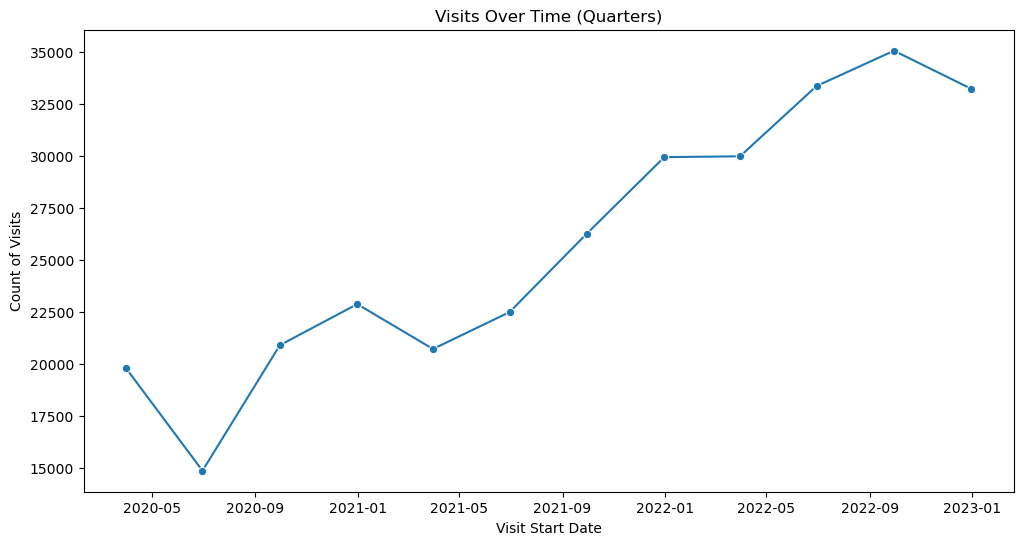

In [9]:
# Line chart for the count of visits over time (quarters)
plt.figure(figsize=(12, 6))
visits_count_over_time = visits_df.resample('Q').size()
sns.lineplot(x=visits_count_over_time.index, y=visits_count_over_time, marker='o')
plt.title('Visits Over Time (Quarters)')
plt.xlabel('Visit Start Date')
plt.ylabel('Count of Visits')
plt.show()

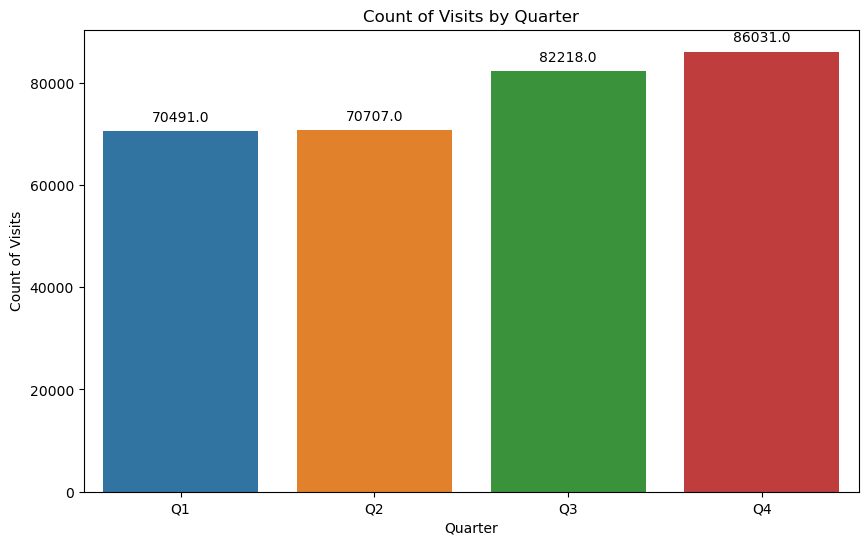

In [10]:
# Bar chart for the count of visits by quarter
plt.figure(figsize=(10, 6))
sns.countplot(x='Quarter', data=visits_df, order=['Q1', 'Q2', 'Q3', 'Q4'])
plt.title('Count of Visits by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Count of Visits')

# Add labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

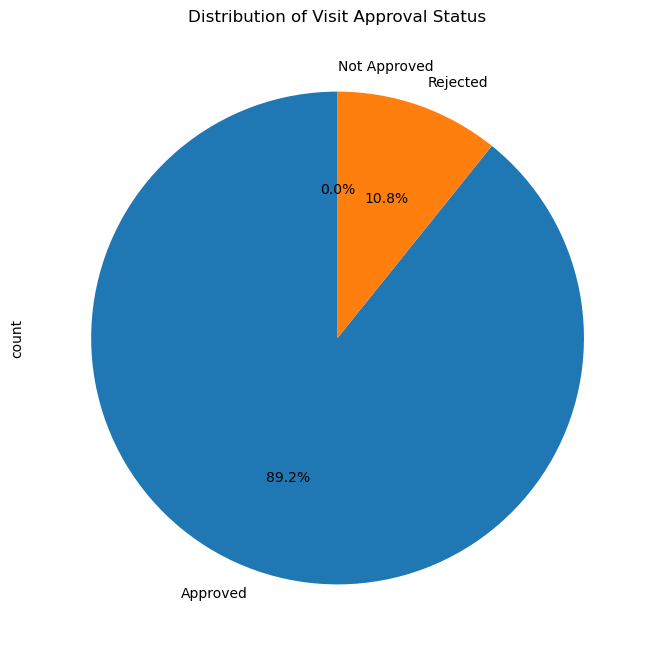

In [11]:
# Pie chart for the distribution of visit approval status
plt.figure(figsize=(8, 8))
visits_df['Visit Approval Status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Visit Approval Status')
plt.show()

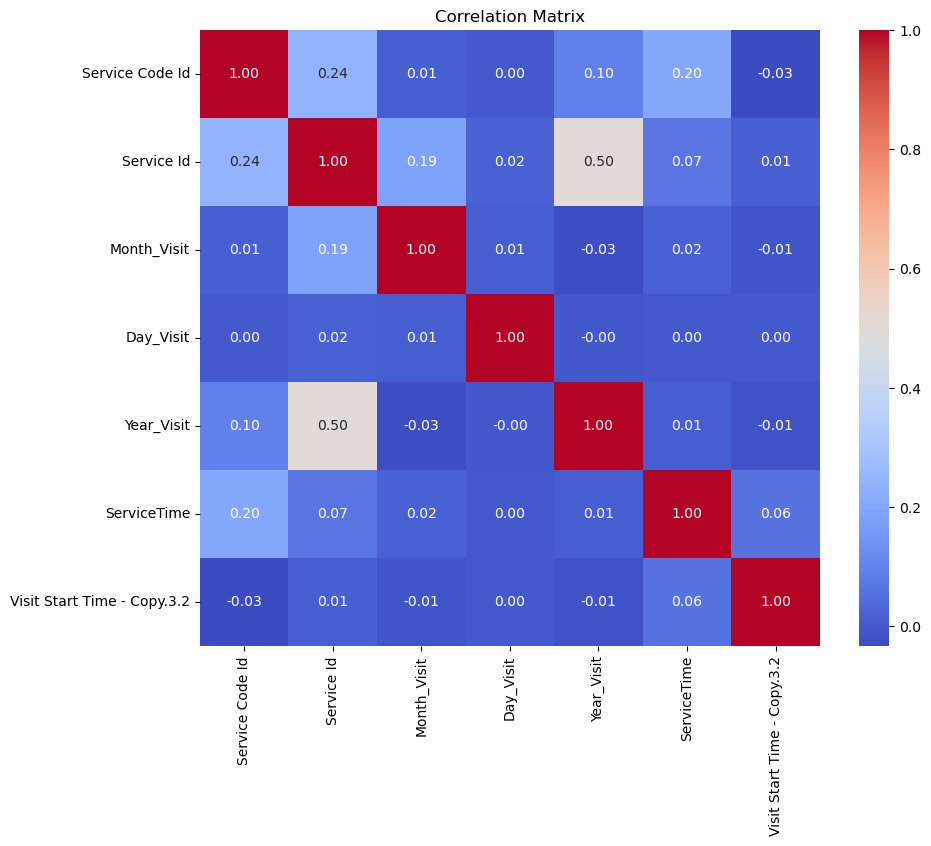

In [12]:
# Heatmap for the correlation matrix
numeric_columns = visits_df.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [13]:
# Resample data to daily frequency for time-series analysis
daily_visits = visits_df.resample('D').size()
visits_df['Number_of_Visits'] = 1

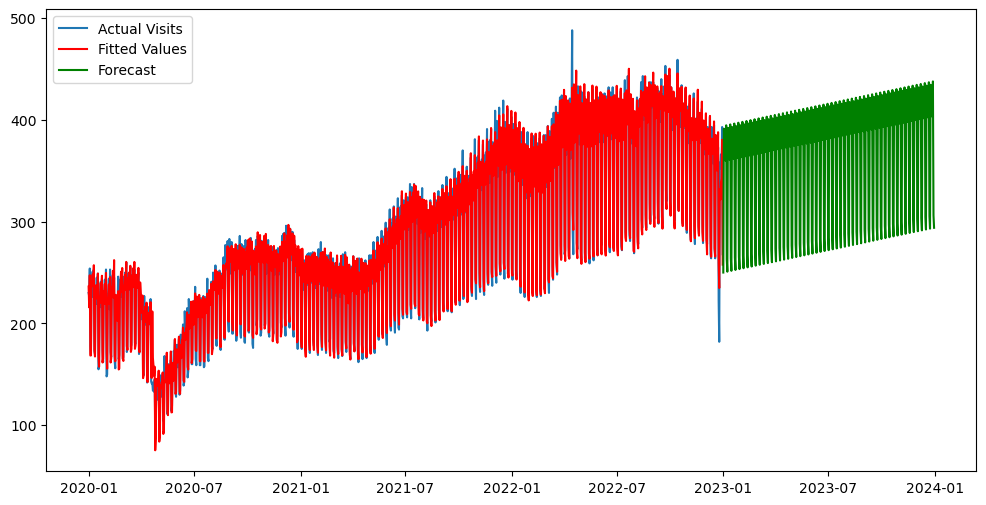

In [14]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# 'daily_visits' is daily time-series data
model = ExponentialSmoothing(daily_visits, trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit()

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_visits.index, daily_visits, label='Actual Visits')
plt.plot(model_fit.fittedvalues.index, model_fit.fittedvalues, color='red', label='Fitted Values')
plt.plot(model_fit.forecast(steps=365).index, model_fit.forecast(steps=365), color='green', label='Forecast')
plt.legend()
plt.show()


In [15]:
file_path = 'C://Users//Jay Patel//Desktop//Canadian Shield Assesment//PowerBI Tables//ClientGroupJunction.xlsx'

# Load the 'clientgroupjunction' data into a DataFrame
clientgroupjunction_df = pd.read_excel(file_path)

In [19]:
merged_df.columns

Index(['Visit_Id', 'Visit End Date', 'Visit End Time',
       'Visit Punch Start Date', 'Visit Punch Start Time',
       'Visit Punch End Date', 'Visit Punch End Time', 'Service Code Id',
       'Service Id', 'Cancel Code Code', 'Visit Approval Status',
       'Employee_Id', 'Client_Id', 'Quarter', 'Month_Visit', 'Day_Visit',
       'Year_Visit', 'ServiceTime', 'MonthName', 'Visit Start Time - Copy.3.2',
       'Number_of_Visits', 'Id', 'group.id', 'Department', 'Zone'],
      dtype='object')

In [21]:
# Merge 'Visits' with 'ClientGroupJunction' to get 'Zone' information
merged_df = pd.merge(visits_df, clientgroupjunction_df, left_on='Client_Id', right_on='Id', how='left')

# 'Visit Start Time' is already in datetime format
merged_df['Year_Visit'] = merged_df['Visit Punch Start Time'].dt.year
merged_df['Quarter'] = merged_df['Visit Punch Start Time'].dt.to_period('Q')

# 'value' is the Forecast column
# Group by Year, Quarter, and Group Name, and count the number of visits
daily_visits = merged_df.groupby(['Year_Visit', 'Quarter', 'Zone'])['Number_of_Visits'].sum().reset_index()


# forecasting model and analysis
# using a simple mean forecast for demonstration
forecast_result = daily_visits.groupby(['Year_Visit', 'Quarter', 'Zone'])['Number_of_Visits'].mean().reset_index()

# Display the forecast results
display(forecast_result)

Year_Visit Quarter              Zone  Number_of_Visits
0        2020.0  2020Q1       Elliot Lake             437.0
1        2020.0  2020Q1               HRH              35.0
2        2020.0  2020Q1         North Bay             298.0
3        2020.0  2020Q1    Off The Street               5.0
4        2020.0  2020Q1              SDMA             120.0
..          ...     ...               ...               ...
158      2022.0  2022Q4  Sudbury - Zone 3            5472.0
159      2022.0  2022Q4  Sudbury - Zone 4              78.0
160      2022.0  2022Q4  Sudbury - Zone 5            9963.0
161      2022.0  2022Q4      Unknown Zone           30146.0
162      2022.0  2022Q4       Wikwemikong               5.0

[163 rows x 4 columns]

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 28.64


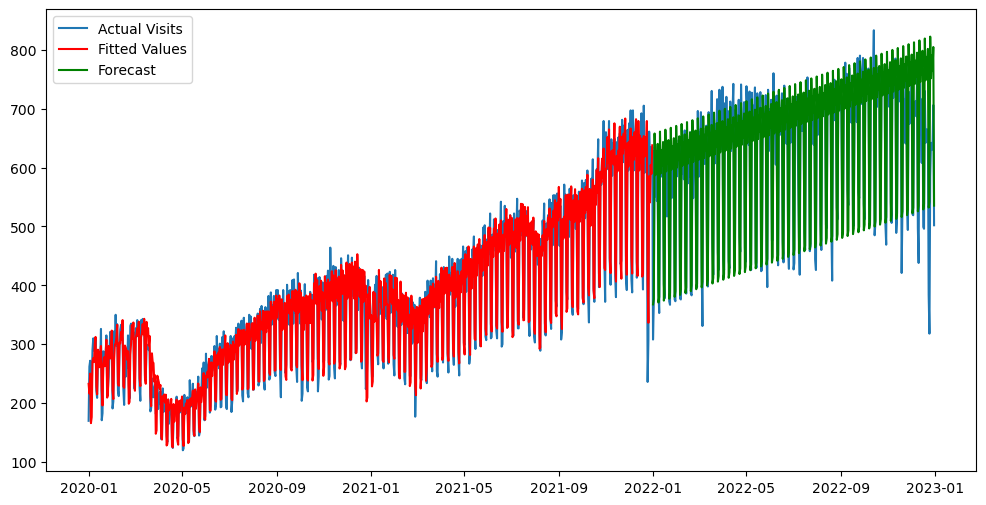

Forecasted Visits by Group:
Zone
Elliot Lake           5486
HRH                    504
INTAKE                 204
North Bay            22983
Off The Street          87
Parry Sound           2822
SDMA                   638
StG - LTC             1768
StJ- LTC               715
Sudbury              12084
Sudbury - Zone 1       349
Sudbury - Zone 2     86770
Sudbury - Zone 3     57528
Sudbury - Zone 4      4289
Sudbury - Zone 5    112355
Unknown Zone        259546
Wikwemikong              7
dtype: int64


In [28]:
# Load and preprocess the data
merged_df['Visit Punch Start Time'] = pd.to_datetime(merged_df['Visit Punch Start Time'])
merged_df.set_index('Visit Punch Start Time', inplace=True)  # Set the datetime column as the index
daily_visits = merged_df.resample('D').size()

# Split the data into training and test sets
train_data = daily_visits.iloc[:-365]  # last year is the test set
test_data = daily_visits.iloc[-365:]

# Train the model
model = ExponentialSmoothing(train_data, trend='add', seasonal='add', seasonal_periods=7)
model_fit = model.fit()

# Assess model performance
y_true = test_data
y_pred = model_fit.forecast(steps=365)
mse = mean_squared_error(y_true, y_pred)
# print(f'Mean Squared Error: {mse}')

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_visits.index, daily_visits, label='Actual Visits')
plt.plot(model_fit.fittedvalues.index, model_fit.fittedvalues, color='red', label='Fitted Values')
plt.plot(test_data.index, y_pred, color='green', label='Forecast')
plt.legend()
plt.show()

# Analyze potential areas for additional resources or service expansion
# groups with higher forecasted demand
group_forecast = merged_df.groupby('Zone').size()

# forecasted values by group
print('Forecasted Visits by Group:')
print(group_forecast)


In [29]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_true, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 32.58338053650983
Root Mean Squared Error (RMSE): 45.69208110029619


None
Mean Absolute Error (MAE): 75.12309178106716
Root Mean Squared Error (RMSE): 88.80766231240848


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


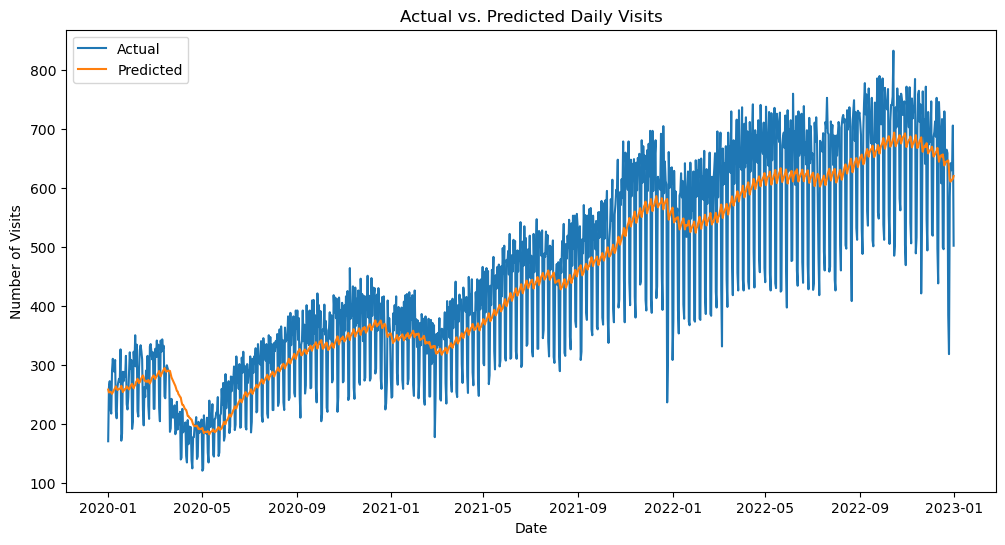

In [30]:
# frequency of time series data
print(daily_visits.index.freq)

# Fit an Exponential Smoothing model
model = ExponentialSmoothing(daily_visits, seasonal='add', seasonal_periods=4)
model_fit = model.fit()

# Predict using the model
# Use the start and end dates that align with data index
start_date = daily_visits.index.min()
end_date = daily_visits.index.max()
predicted_values = model_fit.predict(start=start_date, end=end_date)

# DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Number_of_Visits_Actual': daily_visits,
    'Number_of_Visits_Predicted': predicted_values
})

# Drop rows with missing values
results_df.dropna(inplace=True)

# Actual values with aligned indices
y_true = results_df['Number_of_Visits_Actual']

# Predicted values with aligned indices
y_pred = results_df['Number_of_Visits_Predicted']

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_true, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Actual vs. Predicted Daily Visits')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.legend()
plt.show()


# prophet model by Facebook

In [ ]:
# pip install prophet

In [31]:
from prophet import Prophet
import seaborn as sns


In [32]:
# 'visits.xlsx' is the xlsx file containing the 'Visits' data
# Adjust the file path accordingly
file_path = 'C://Users//Jay Patel//Desktop//Canadian Shield Assesment//PowerBI Tables//Visits.xlsx'

# Load the 'Visits' data into a DataFrame
visits_df = pd.read_excel(file_path)

# Make sure 'Visit Start Date' is in datetime format
visits_df['Visit Start Date'] = pd.to_datetime(visits_df['Visit Start Date'])

# Set 'Visit Start Date' as the index
visits_df.set_index('Visit Start Date', inplace=True)

# Overview of the DataFrame
print(visits_df.head())

                              Visit_Id    Visit Start Time  \
Visit Start Date                                             
1970-01-01 00:27:44.582400  VIS1463372 2022-10-01 10:35:00   
1970-01-01 00:27:44.582400  VIS1483733 2022-10-01 10:20:00   
1970-01-01 00:27:44.582400  VIS1549278 2022-10-01 10:15:00   
1970-01-01 00:27:44.582400  VIS1553335 2022-10-01 10:35:00   
1970-01-01 00:27:44.582400  VIS1563166 2022-10-01 10:45:00   

                                       Visit End Date      Visit End Time  \
Visit Start Date                                                            
1970-01-01 00:27:44.582400  Saturday, October 1, 2022 2022-10-01 11:05:00   
1970-01-01 00:27:44.582400  Saturday, October 1, 2022 2022-10-01 10:50:00   
1970-01-01 00:27:44.582400  Saturday, October 1, 2022 2022-10-01 10:45:00   
1970-01-01 00:27:44.582400  Saturday, October 1, 2022 2022-10-01 11:05:00   
1970-01-01 00:27:44.582400  Saturday, October 1, 2022 2022-10-01 11:15:00   

                         

In [33]:
# Make sure 'Visit Start Date' is in datetime format
visits_df['Visit Start Time'] = pd.to_datetime(visits_df['Visit Start Time'])

# Set 'Visit Start Date' as the index
visits_df.set_index('Visit Start Time', inplace=True)

# Overview of the DataFrame
print(visits_df.head())

                       Visit_Id             Visit End Date  \
Visit Start Time                                             
2022-10-01 10:35:00  VIS1463372  Saturday, October 1, 2022   
2022-10-01 10:20:00  VIS1483733  Saturday, October 1, 2022   
2022-10-01 10:15:00  VIS1549278  Saturday, October 1, 2022   
2022-10-01 10:35:00  VIS1553335  Saturday, October 1, 2022   
2022-10-01 10:45:00  VIS1563166  Saturday, October 1, 2022   

                         Visit End Time     Visit Punch Start Date  \
Visit Start Time                                                     
2022-10-01 10:35:00 2022-10-01 11:05:00  Saturday, October 1, 2022   
2022-10-01 10:20:00 2022-10-01 10:50:00  Saturday, October 1, 2022   
2022-10-01 10:15:00 2022-10-01 10:45:00  Saturday, October 1, 2022   
2022-10-01 10:35:00 2022-10-01 11:05:00  Saturday, October 1, 2022   
2022-10-01 10:45:00 2022-10-01 11:15:00  Saturday, October 1, 2022   

                    Visit Punch Start Time       Visit Punch End Date  \
V

In [34]:
# Resample data to daily frequency for time-series analysis
daily_visits = visits_df.resample('D').size()
visits_df['Number_of_Visits'] = 1

In [35]:
file_path = 'C://Users//Jay Patel//Desktop//Canadian Shield Assesment//PowerBI Tables//ClientGroupJunction.xlsx'

# Load the 'clientgroupjunction' data into a DataFrame
clientgroupjunction_df = pd.read_excel(file_path)

In [38]:
# Merge 'Visits' with 'ClientGroupJunction' to get 'Zone' information
merged_df = pd.merge(visits_df, clientgroupjunction_df, left_on='Client_Id', right_on='Id', how='left')

# 'Visit Start Time' is already in datetime format
merged_df['Year_Visit'] = merged_df['Visit Punch Start Time'].dt.year
merged_df['Quarter'] = merged_df['Visit Punch Start Time'].dt.to_period('Q')

# Group by Year, Quarter, and Group Name, and count the number of visits
daily_visits = merged_df.groupby(['Year_Visit', 'Quarter', 'Zone'])['Number_of_Visits'].sum().reset_index()


# forecasting model and analysis
# using a simple mean forecast demonstration
forecast_result = daily_visits.groupby(['Year_Visit', 'Quarter', 'Zone'])['Number_of_Visits'].mean().reset_index()

# Display the forecast results
display(forecast_result)

Year_Visit Quarter              Zone  Number_of_Visits
0        2020.0  2020Q1       Elliot Lake             437.0
1        2020.0  2020Q1               HRH              35.0
2        2020.0  2020Q1         North Bay             298.0
3        2020.0  2020Q1    Off The Street               5.0
4        2020.0  2020Q1              SDMA             120.0
..          ...     ...               ...               ...
158      2022.0  2022Q4  Sudbury - Zone 3            5472.0
159      2022.0  2022Q4  Sudbury - Zone 4              78.0
160      2022.0  2022Q4  Sudbury - Zone 5            9963.0
161      2022.0  2022Q4      Unknown Zone           30146.0
162      2022.0  2022Q4       Wikwemikong               5.0

[163 rows x 4 columns]

In [39]:
display(merged_df)

Visit_Id                Visit End Date      Visit End Time  \
0       VIS1463372     Saturday, October 1, 2022 2022-10-01 11:05:00   
1       VIS1463372     Saturday, October 1, 2022 2022-10-01 11:05:00   
2       VIS1483733     Saturday, October 1, 2022 2022-10-01 10:50:00   
3       VIS1483733     Saturday, October 1, 2022 2022-10-01 10:50:00   
4       VIS1549278     Saturday, October 1, 2022 2022-10-01 10:45:00   
...            ...                           ...                 ...   
569358  VIS1609096  Wednesday, December 28, 2022 2022-12-28 16:30:00   
569359  VIS1609097   Thursday, December 29, 2022 2022-12-29 16:30:00   
569360  VIS1609097   Thursday, December 29, 2022 2022-12-29 16:30:00   
569361  VIS1622878     Friday, December 30, 2022 2022-12-30 16:30:00   
569362  VIS1622878     Friday, December 30, 2022 2022-12-30 16:30:00   

              Visit Punch Start Date Visit Punch Start Time  \
0          Saturday, October 1, 2022    2022-10-01 10:19:00   
1          Saturday, October 1, 2022    2022-10-01 10:19:00   
2          Saturday, October 1, 2022    2022-10-01 09:55:00   
3          Saturday, October 1, 2022    2022-10-01 09:55:00   
4          Saturday, October 1, 2022    2022-10-01 12:06:00   
...                              ...                    ...   
569358  Wednesday, December 28, 2022    2022-12-28 08:25:00   
569359   Thursday, December 29, 2022    2022-12-29 08:19:00   
569360   Thursday, December 29, 2022    2022-12-29 08:19:00   
569361     Friday, December 30, 2022    2022-12-30 08:14:00   
569362     Friday, December 30, 2022    2022-12-30 08:14:00   

                Visit Punch End Date Visit Punch End Time  Service Code Id  \
0          Saturday, October 1, 2022  2022-10-01 10:59:00               48   
1          Saturday, October 1, 2022  2022-10-01 10:59:00               48   
2          Saturday, October 1, 2022  2022-10-01 10:16:00               48   
3          Saturday, October 1, 2022  2022-10-01 10:16:00               48   
4          Saturday, October 1, 2022  2022-10-01 12:31:00               48   
...                              ...                  ...              ...   
569358  Wednesday, December 28, 2022  2022-12-28 16:31:00               44   
569359   Thursday, December 29, 2022  2022-12-29 16:44:00               44   
569360   Thursday, December 29, 2022  2022-12-29 16:44:00               44   
569361     Friday, December 30, 2022  2022-12-30 16:32:00               44   
569362     Friday, December 30, 2022  2022-12-30 16:32:00               44   

        Service Id Cancel Code Code  ... Day_Visit Year_Visit ServiceTime  \
0             2476    not cancelled  ...         1     2022.0          30   
1             2476    not cancelled  ...         1     2022.0          30   
2             2918    not cancelled  ...         1     2022.0          30   
3             2918    not cancelled  ...         1     2022.0          30   
4             2399    not cancelled  ...         1     2022.0          30   
...            ...              ...  ...       ...        ...         ...   
569358         113    not cancelled  ...        28     2022.0           0   
569359         113    not cancelled  ...        29     2022.0           0   
569360         113    not cancelled  ...        29     2022.0           0   
569361         113    not cancelled  ...        30     2022.0           0   
569362         113    not cancelled  ...        30     2022.0           0   

       MonthName  Visit Start Time - Copy.3.2  Number_of_Visits       Id  \
0        October                           10                 1  CLI2583   
1        October                           10                 1  CLI2583   
2        October                           10                 1  CLI2937   
3        October                           10                 1  CLI2937   
4        October                           10                 1  CLI2519   
...          ...                          ...               ...      .

In [40]:
merged_df.columns

Index(['Visit_Id', 'Visit End Date', 'Visit End Time',
       'Visit Punch Start Date', 'Visit Punch Start Time',
       'Visit Punch End Date', 'Visit Punch End Time', 'Service Code Id',
       'Service Id', 'Cancel Code Code', 'Visit Approval Status',
       'Employee_Id', 'Client_Id', 'Quarter', 'Month_Visit', 'Day_Visit',
       'Year_Visit', 'ServiceTime', 'MonthName', 'Visit Start Time - Copy.3.2',
       'Number_of_Visits', 'Id', 'group.id', 'Department', 'Zone'],
      dtype='object')

03:34:38 - cmdstanpy - INFO - Chain [1] start processing
03:34:38 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 131.46911085058247
Root Mean Squared Error (RMSE): 148.9821891036031


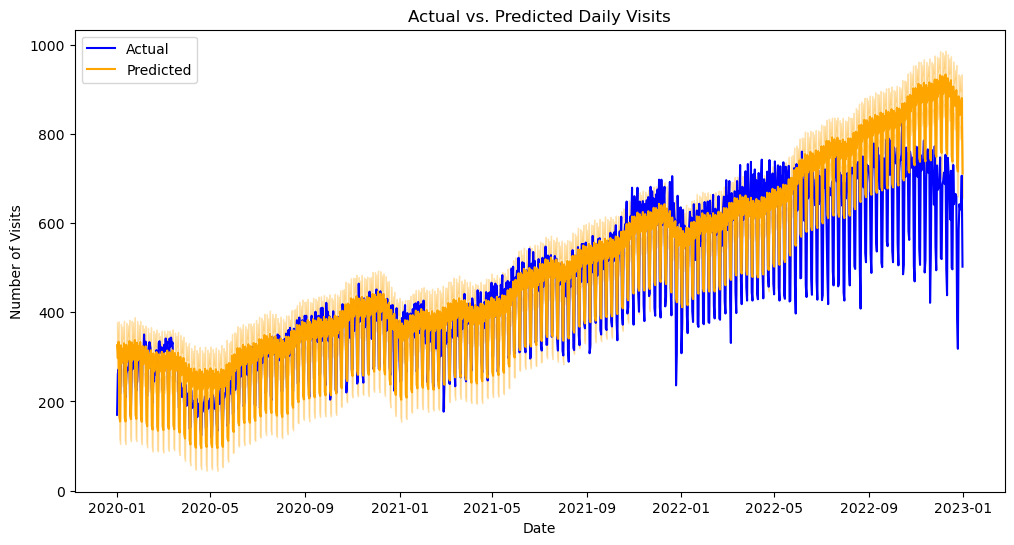

In [41]:
# Convert 'Visit Punch Start Time' to datetime format
merged_df['Visit Punch Start Time'] = pd.to_datetime(merged_df['Visit Punch Start Time'])

# Set 'Visit Punch Start Time' as the index
merged_df.set_index('Visit Punch Start Time', inplace=True)

# Load and preprocess the data
daily_visits = merged_df.resample('D').size()

# Reset the index to get 'Visit Punch Start Time' back as a column
daily_visits = daily_visits.reset_index()
daily_visits.columns = ['ds', 'y']

# Split the data into training and test sets
train_size = int(len(daily_visits) * 0.8)
train_data, test_data = daily_visits.iloc[:train_size], daily_visits.iloc[train_size:]

# Fit Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(train_data)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=len(test_data))

# Forecast using the model
forecast = model.predict(future)

# Extract the actual and predicted values
y_true = daily_visits['y'].iloc[train_size:]
y_pred = forecast['yhat'].iloc[train_size:]

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_true, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize actual vs. predicted values
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(daily_visits['ds'], daily_visits['y'], label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='orange')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3)
ax.set_title('Actual vs. Predicted Daily Visits')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Visits')
ax.legend()
plt.show()


# PROPHET model with different parameters

03:34:40 - cmdstanpy - INFO - Chain [1] start processing
03:34:40 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 135.0216755051819
Root Mean Squared Error (RMSE): 152.48588990413208


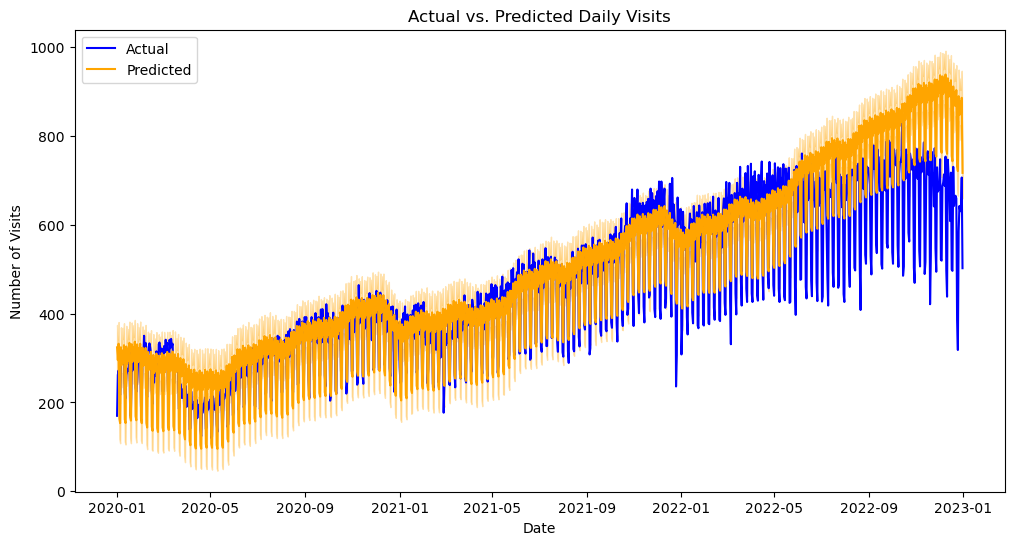

In [42]:
daily_visits = merged_df.resample('D').size()

# Reset the index to get 'Visit Punch Start Time' back as a column
daily_visits = daily_visits.reset_index()
daily_visits.columns = ['ds', 'y']

# Split the data into training and test sets
train_size = int(len(daily_visits) * 0.8)
train_data, test_data = daily_visits.iloc[:train_size], daily_visits.iloc[train_size:]

# Fit a Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.05,
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
)
model.fit(train_data)

# dataframe with future dates for prediction
future = model.make_future_dataframe(periods=len(test_data))

# Forecast using the model
forecast = model.predict(future)

# Extract the actual and predicted values
y_true = daily_visits['y'].iloc[train_size:]
y_pred = forecast['yhat'].iloc[train_size:]

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_true, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Visualize actual vs. predicted values
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(daily_visits['ds'], daily_visits['y'], label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='orange')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3)
ax.set_title('Actual vs. Predicted Daily Visits')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Visits')
ax.legend()
plt.show()


Seasonality Prior:   0%|                                                                         | 0/4 [00:00<?, ?it/s]03:34:41 - cmdstanpy - INFO - Chain [1] start processing
03:34:41 - cmdstanpy - INFO - Chain [1] done processing

Seasonality Prior:  25%|████████████████▎                                                | 1/4 [00:00<00:02,  1.43it/s]

Changepoint Prior: 0.001, Seasonality Prior: 0.01, MAE: 53.92204601272786


03:34:42 - cmdstanpy - INFO - Chain [1] start processing
03:34:42 - cmdstanpy - INFO - Chain [1] done processing

Seasonality Prior:  50%|████████████████████████████████▌                                | 2/4 [00:01<00:01,  1.43it/s]

Changepoint Prior: 0.001, Seasonality Prior: 0.1, MAE: 52.76969684156515


03:34:42 - cmdstanpy - INFO - Chain [1] start processing
03:34:42 - cmdstanpy - INFO - Chain [1] done processing

Seasonality Prior:  75%|████████████████████████████████████████████████▊                | 3/4 [00:02<00:00,  1.44it/s]

Changepoint Prior: 0.001, Seasonality Prior: 1.0, MAE: 53.293128618397716


03:34:43 - cmdstanpy - INFO - Chain [1] start processing
03:34:43 - cmdstanpy - INFO - Chain [1] done processing

Changepoint Prior:  25%|████████████████▎                                                | 1/4 [00:02<00:08,  2.75s/it]

Changepoint Prior: 0.001, Seasonality Prior: 10.0, MAE: 51.80177631570984



Seasonality Prior:   0%|                                                                         | 0/4 [00:00<?, ?it/s]03:34:44 - cmdstanpy - INFO - Chain [1] start processing
03:34:44 - cmdstanpy - INFO - Chain [1] done processing

Seasonality Prior:  25%|████████████████▎                                                | 1/4 [00:00<00:02,  1.30it/s]

Changepoint Prior: 0.01, Seasonality Prior: 0.01, MAE: 77.93194820788018


03:34:44 - cmdstanpy - INFO - Chain [1] start processing
03:34:45 - cmdstanpy - INFO - Chain [1] done processing

Seasonality Prior:  50%|████████████████████████████████▌                                | 2/4 [00:01<00:01,  1.28it/s]

Changepoint Prior: 0.01, Seasonality Prior: 0.1, MAE: 80.22515953137562


03:34:45 - cmdstanpy - INFO - Chain [1] start processing
03:34:45 - cmdstanpy - INFO - Chain [1] done processing

Seasonality Prior:  75%|████████████████████████████████████████████████▊                | 3/4 [00:02<00:00,  1.30it/s]

Changepoint Prior: 0.01, Seasonality Prior: 1.0, MAE: 79.05587863316488


03:34:46 - cmdstanpy - INFO - Chain [1] start processing
03:34:46 - cmdstanpy - INFO - Chain [1] done processing

Changepoint Prior:  50%|████████████████████████████████▌                                | 2/4 [00:05<00:05,  2.92s/it]

Changepoint Prior: 0.01, Seasonality Prior: 10.0, MAE: 79.90922678447485



Seasonality Prior:   0%|                                                                         | 0/4 [00:00<?, ?it/s]03:34:47 - cmdstanpy - INFO - Chain [1] start processing
03:34:47 - cmdstanpy - INFO - Chain [1] done processing

Seasonality Prior:  25%|████████████████▎                                                | 1/4 [00:00<00:02,  1.29it/s]

Changepoint Prior: 0.1, Seasonality Prior: 0.01, MAE: 104.41367587299132


03:34:47 - cmdstanpy - INFO - Chain [1] start processing
03:34:48 - cmdstanpy - INFO - Chain [1] done processing

Seasonality Prior:  50%|████████████████████████████████▌                                | 2/4 [00:01<00:01,  1.32it/s]

Changepoint Prior: 0.1, Seasonality Prior: 0.1, MAE: 146.97771128348558


03:34:48 - cmdstanpy - INFO - Chain [1] start processing
03:34:48 - cmdstanpy - INFO - Chain [1] done processing

Seasonality Prior:  75%|████████████████████████████████████████████████▊                | 3/4 [00:02<00:00,  1.36it/s]

Changepoint Prior: 0.1, Seasonality Prior: 1.0, MAE: 145.80411358829838


03:34:49 - cmdstanpy - INFO - Chain [1] start processing
03:34:49 - cmdstanpy - INFO - Chain [1] done processing

Changepoint Prior:  75%|████████████████████████████████████████████████▊                | 3/4 [00:08<00:02,  2.97s/it]

Changepoint Prior: 0.1, Seasonality Prior: 10.0, MAE: 148.77408825238368



Seasonality Prior:   0%|                                                                         | 0/4 [00:00<?, ?it/s]03:34:50 - cmdstanpy - INFO - Chain [1] start processing
03:34:50 - cmdstanpy - INFO - Chain [1] done processing

Seasonality Prior:  25%|████████████████▎                                                | 1/4 [00:00<00:02,  1.11it/s]

Changepoint Prior: 0.5, Seasonality Prior: 0.01, MAE: 52.79981364621609


03:34:51 - cmdstanpy - INFO - Chain [1] start processing
03:34:51 - cmdstanpy - INFO - Chain [1] done processing

Seasonality Prior:  50%|████████████████████████████████▌                                | 2/4 [00:01<00:01,  1.06it/s]

Changepoint Prior: 0.5, Seasonality Prior: 0.1, MAE: 57.60104741282138


03:34:51 - cmdstanpy - INFO - Chain [1] start processing
03:34:52 - cmdstanpy - INFO - Chain [1] done processing

Seasonality Prior:  75%|████████████████████████████████████████████████▊                | 3/4 [00:02<00:00,  1.05it/s]

Changepoint Prior: 0.5, Seasonality Prior: 1.0, MAE: 66.65860354000121


03:34:52 - cmdstanpy - INFO - Chain [1] start processing
03:34:53 - cmdstanpy - INFO - Chain [1] done processing

Changepoint Prior: 100%|█████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.12s/it]

Changepoint Prior: 0.5, Seasonality Prior: 10.0, MAE: 73.57447318846663
Best Parameters: {'changepoint_prior_scale': 0.001, 'seasonality_prior_scale': 10.0}
Best MAE: 51.80177631570984



03:34:53 - cmdstanpy - INFO - Chain [1] start processing
03:34:53 - cmdstanpy - INFO - Chain [1] done processing


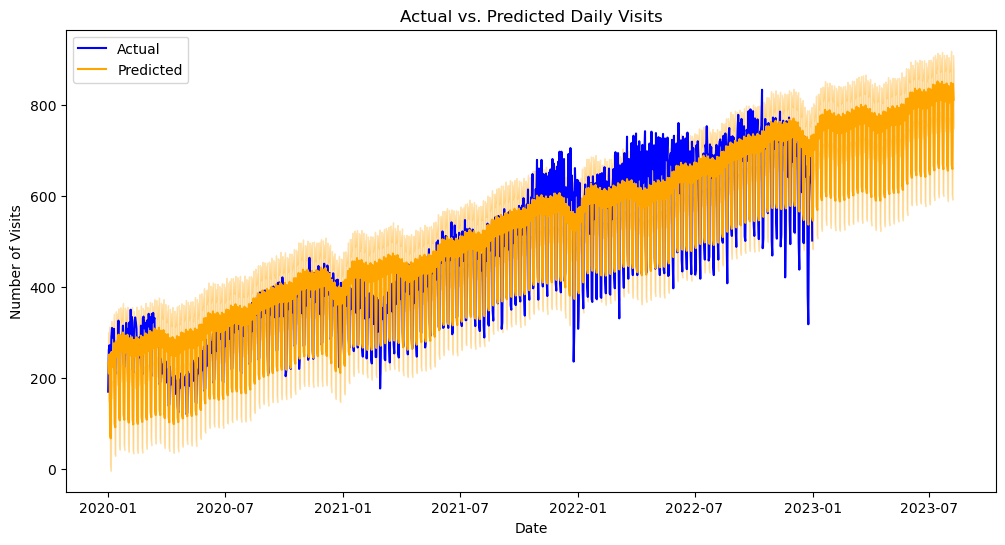

In [43]:
from tqdm import tqdm

# Define parameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Split the data into training and validation sets
train_size = int(len(daily_visits) * 0.8)
train_data, val_data = daily_visits.iloc[:train_size], daily_visits.iloc[train_size:]

# Initialize best MAE and best parameters
best_mae = float('inf')
best_params = None

# Perform grid search
for changepoint_prior in tqdm(param_grid['changepoint_prior_scale'], desc='Changepoint Prior'):
    for seasonality_prior in tqdm(param_grid['seasonality_prior_scale'], desc='Seasonality Prior', leave=False):
        # Fit the model
        model = Prophet(changepoint_prior_scale=changepoint_prior, seasonality_prior_scale=seasonality_prior,
                        yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
        model.fit(train_data)

        # Make predictions on the validation set
        future = model.make_future_dataframe(periods=len(val_data))
        forecast = model.predict(future)

        # Calculate MAE
        mae = mean_absolute_error(val_data['y'], forecast['yhat'][-len(val_data):])

        # Display the scores
        print(f'Changepoint Prior: {changepoint_prior}, Seasonality Prior: {seasonality_prior}, MAE: {mae}')

        # Update best parameters if needed
        if mae < best_mae:
            best_mae = mae
            best_params = {'changepoint_prior_scale': changepoint_prior, 'seasonality_prior_scale': seasonality_prior}

# Print the best parameters and score
print(f'Best Parameters: {best_params}')
print(f'Best MAE: {best_mae}')

# Fit the final model with the best parameters
final_model = Prophet(changepoint_prior_scale=best_params['changepoint_prior_scale'],
                      seasonality_prior_scale=best_params['seasonality_prior_scale'],
                      yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
final_model.fit(daily_visits)

# Visualize actual vs. predicted values
future = final_model.make_future_dataframe(periods=len(test_data))
forecast = final_model.predict(future)

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(daily_visits['ds'], daily_visits['y'], label='Actual', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], label='Predicted', color='orange')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3)
ax.set_title('Actual vs. Predicted Daily Visits')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Visits')
ax.legend()
plt.show()


# ASSESSMENT - 2

In [44]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

In [45]:
# Load 'visits.xlsx' and 'clientgroupjunction' data
visits_file_path = 'C://Users//Jay Patel//Desktop//Canadian Shield Assesment//PowerBI Tables//Visits.xlsx'
clientgroupjunction_file_path = 'C://Users//Jay Patel//Desktop//Canadian Shield Assesment//PowerBI Tables//ClientGroupJunction.xlsx'

# Read data into DataFrames
visits_df = pd.read_excel(visits_file_path)
clientgroupjunction_df = pd.read_excel(clientgroupjunction_file_path)

# Merging data to get insights
# (merging helps combine information from different tables)
merged_df = pd.merge(visits_df, clientgroupjunction_df, left_on='Client_Id', right_on='Id', how='left')

# Ensure 'Visit Punch Start Time' is in datetime format
merged_df['Visit Punch Start Time'] = pd.to_datetime(merged_df['Visit Punch Start Time'])

# Set 'Visit Punch Start Time' as the index
merged_df.set_index('Visit Punch Start Time', inplace=True)

# Resample data to daily, monthly, quarterly, and yearly frequency for time-series analysis
daily_visits = merged_df.resample('D').size()
monthly_visits = merged_df.resample('M').size()
quarterly_visits = merged_df.resample('Q').size()
yearly_visits = merged_df.resample('Y').size()


In [46]:
# Function to perform Holt-Winters forecasting for a given frequency
def holt_winters_forecast(data, frequency, department, zone):
    if frequency <= 1:
        raise ValueError("seasonal_periods must be larger than 1.")

    if frequency == 1:
        # For yearly forecasts with limited data, use a simple average
        forecast_index = data.index[-1] + pd.DateOffset(years=frequency)
        forecast = pd.Series(data.mean(), index=[forecast_index])
    else:
        try:
            model = ExponentialSmoothing(
                data,
                trend='add',
                seasonal='add',
                seasonal_periods=frequency,
                initialization_method='estimated'
            )
            model_fit = model.fit()
        except ValueError as e:
            print(f"Error: {e}")
            print("Using mean for the forecast.")
            forecast_index = data.index[-1] + pd.DateOffset(years=frequency)
            forecast = pd.Series(data.mean(), index=[forecast_index])
        else:
            # Forecast for the next 'frequency' periods
            forecast = model_fit.forecast(steps=frequency)

    # Plot the actual vs. forecasted values
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data, label='Actual Visits')
    plt.plot(forecast.index, forecast, color='green', label='Forecast')
    plt.title(f'Visits Forecast for Department: {department}, Zone: {zone} ({frequency} periods)')
    plt.xlabel('Visit Start Time')
    plt.ylabel('Count of Visits')
    plt.legend()
    plt.show()

    return forecast

Forecasting for Department: Home Care, Zone: Unknown Zone


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


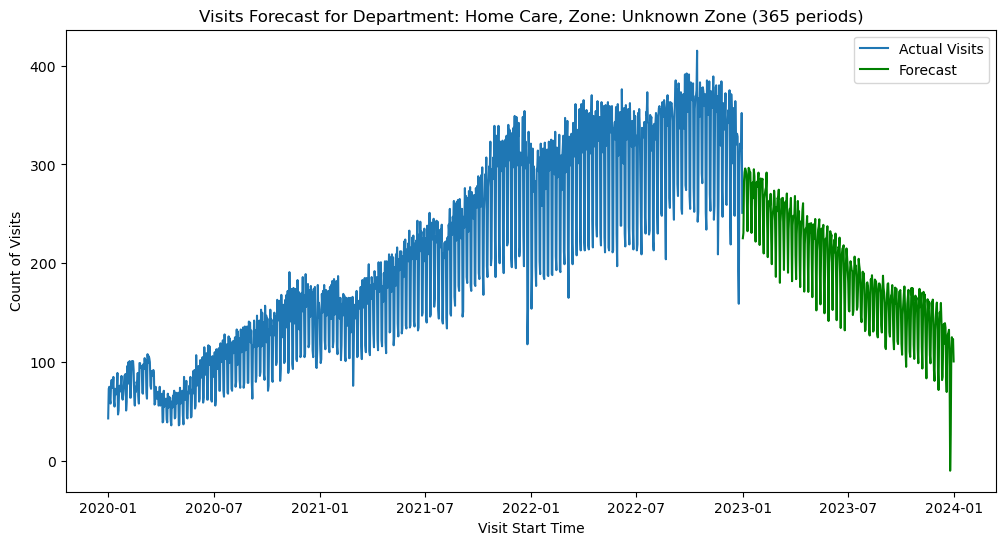

Forecasting for Department: Mental Health, Zone: Unknown Zone


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


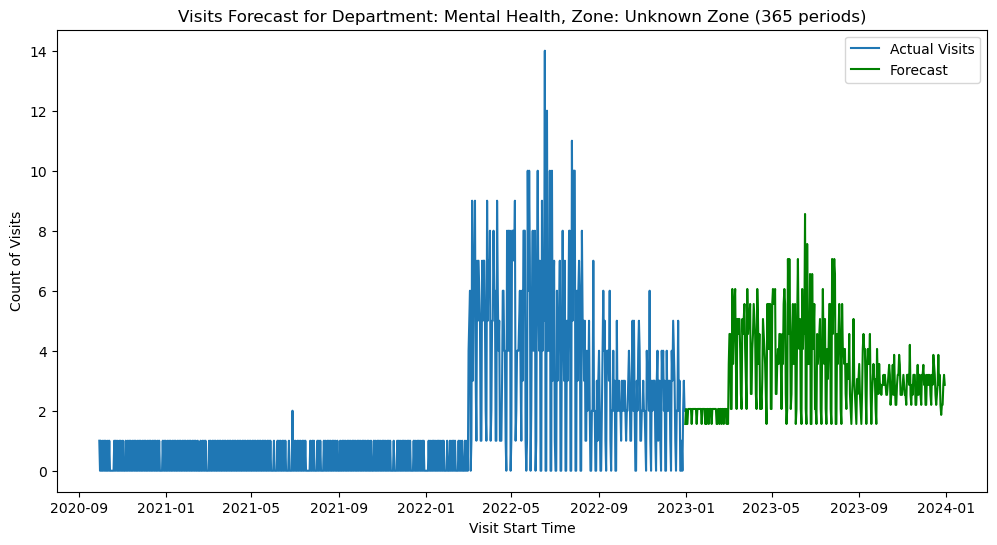

Forecasting for Department: No Department assigned, Zone: Elliot Lake


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


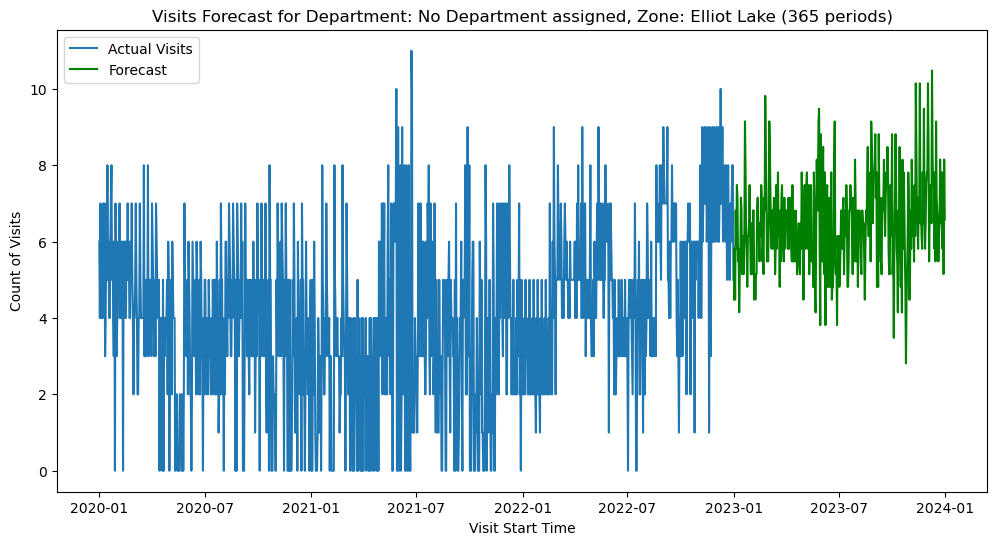

Forecasting for Department: No Department assigned, Zone: HRH


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


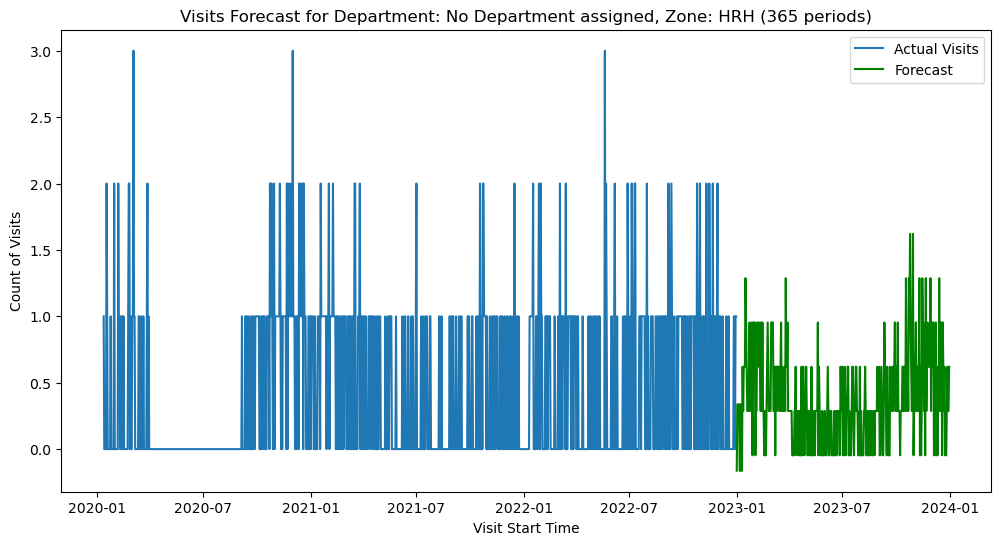

Forecasting for Department: No Department assigned, Zone: INTAKE
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


OutOfBoundsDatetime: Cannot cast 2387-09-14 00:00:00 to unit='ns' without overflow.

In [47]:
# Forecasting and Visualization
# (we're predicting future trends)
for (department, zone), subset_df in merged_df.groupby(['Department', 'Zone']):
    print(f"Forecasting for Department: {department}, Zone: {zone}")
    
    # Forecast for daily visits
    daily_forecast = holt_winters_forecast(subset_df.resample('D').size(), 365, department, zone)

Forecasting for Department: Home Care, Zone: Unknown Zone


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


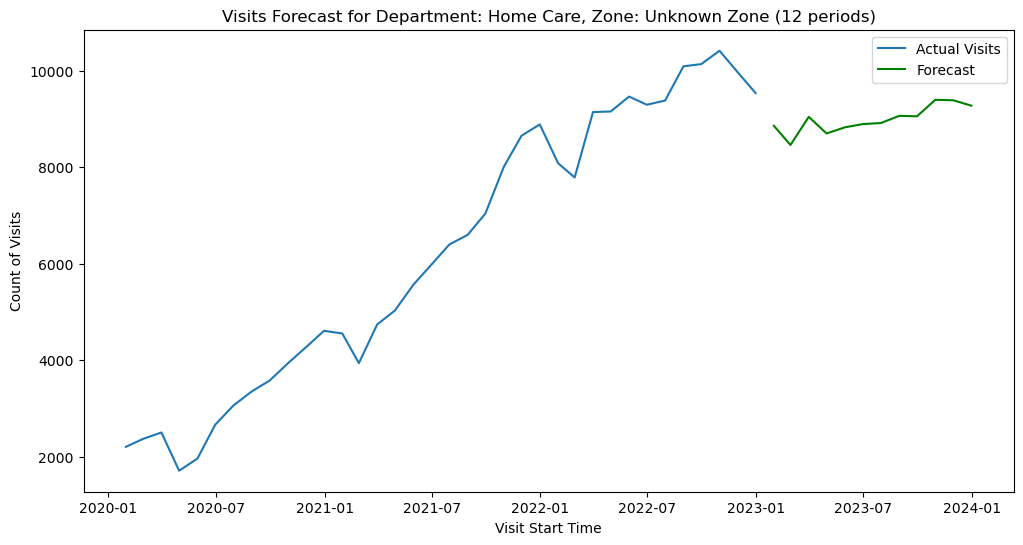

Forecasting for Department: Mental Health, Zone: Unknown Zone


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


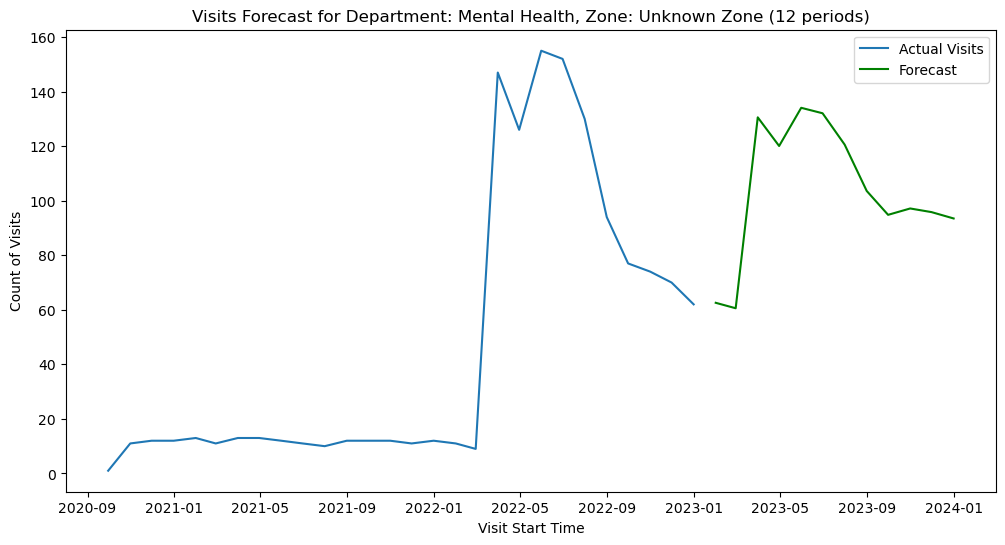

Forecasting for Department: No Department assigned, Zone: Elliot Lake


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


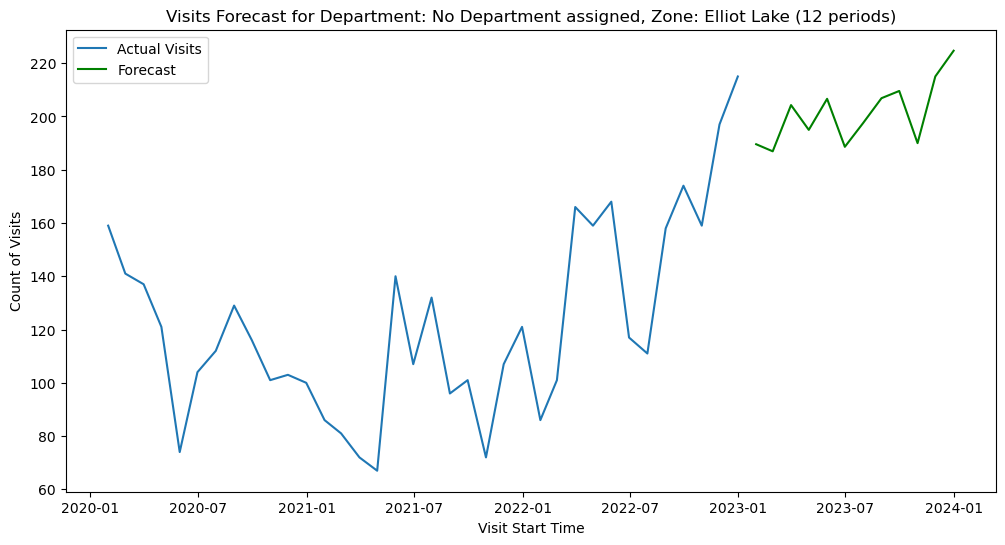

Forecasting for Department: No Department assigned, Zone: HRH


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


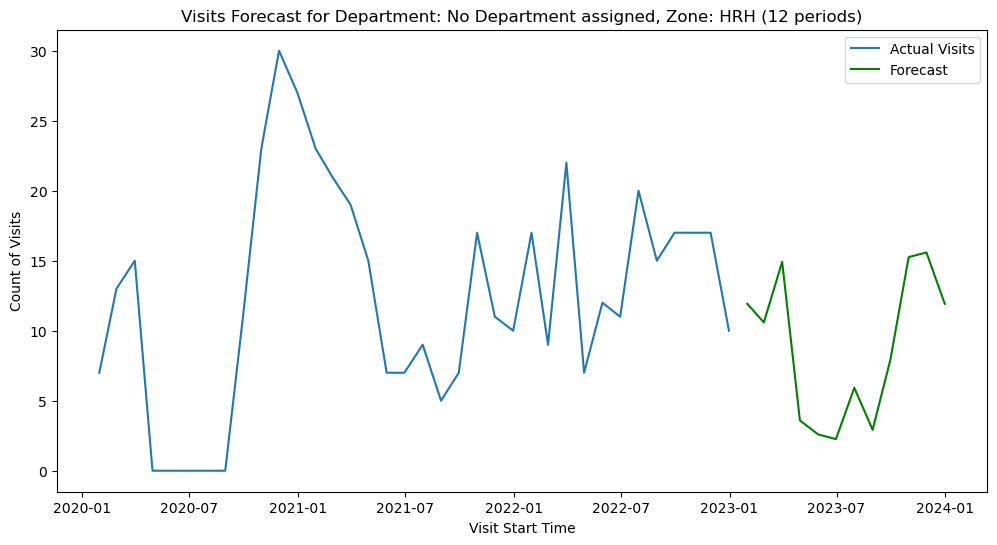

Forecasting for Department: No Department assigned, Zone: INTAKE
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


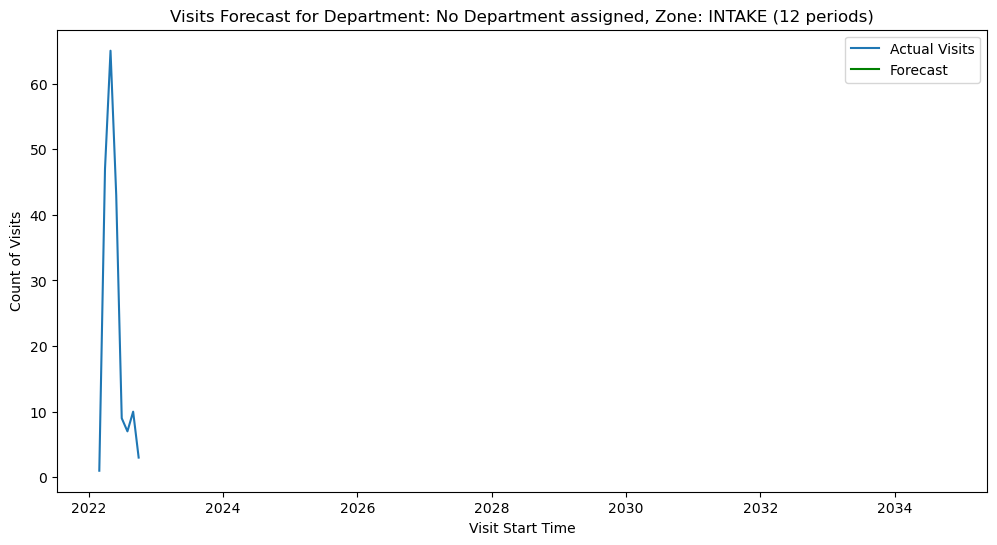

Forecasting for Department: No Department assigned, Zone: North Bay


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


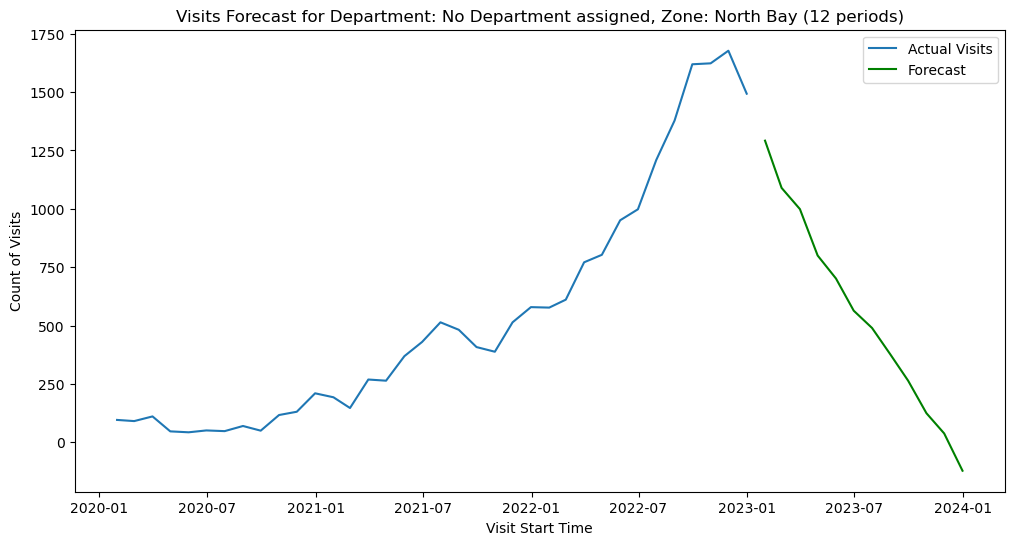

Forecasting for Department: No Department assigned, Zone: Off The Street


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


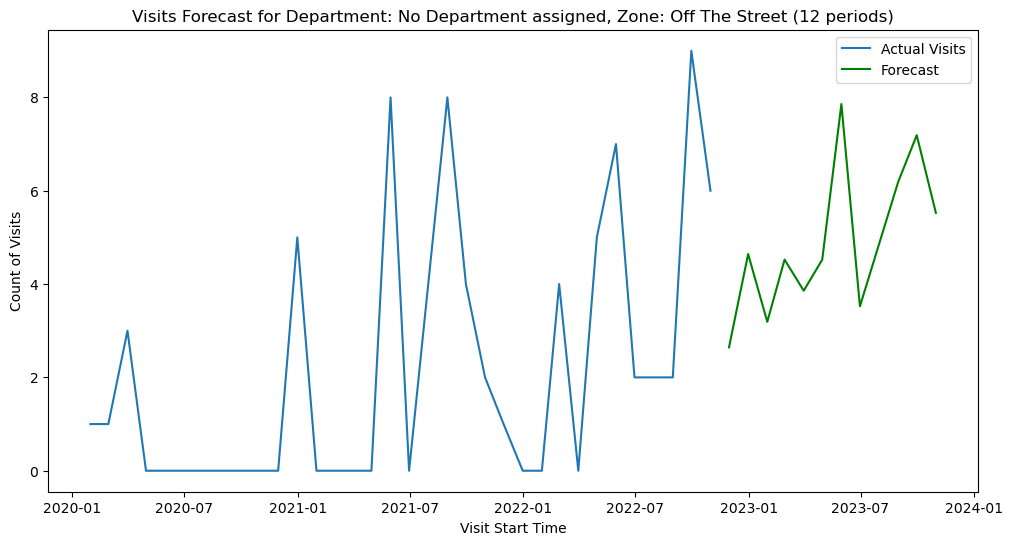

Forecasting for Department: No Department assigned, Zone: Parry Sound
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


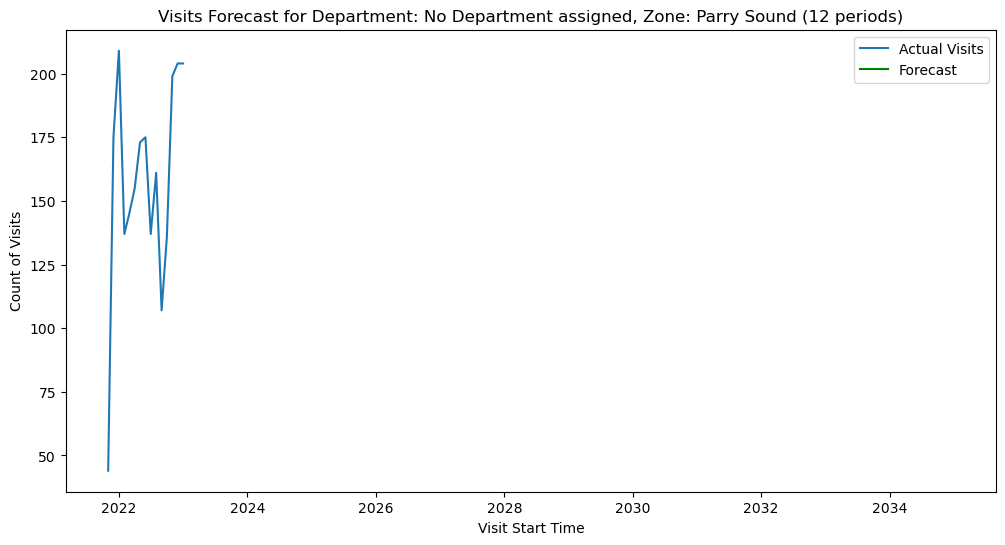

Forecasting for Department: No Department assigned, Zone: SDMA


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


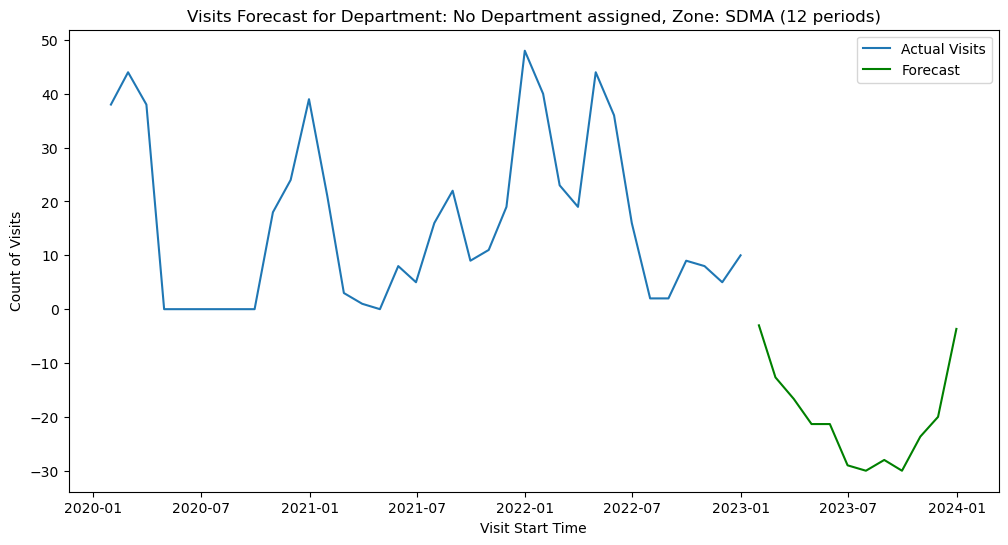

Forecasting for Department: No Department assigned, Zone: StG - LTC


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


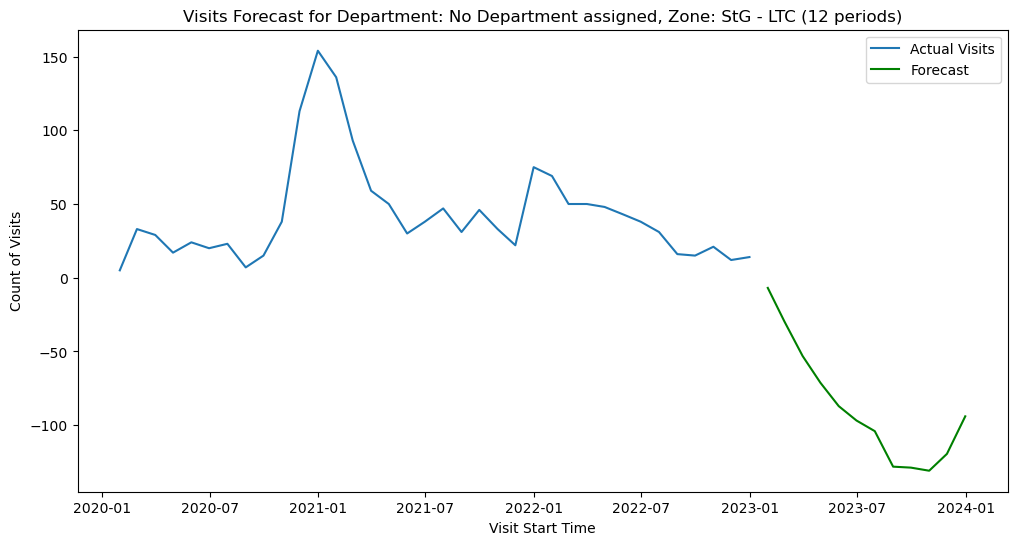

Forecasting for Department: No Department assigned, Zone: StJ- LTC


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


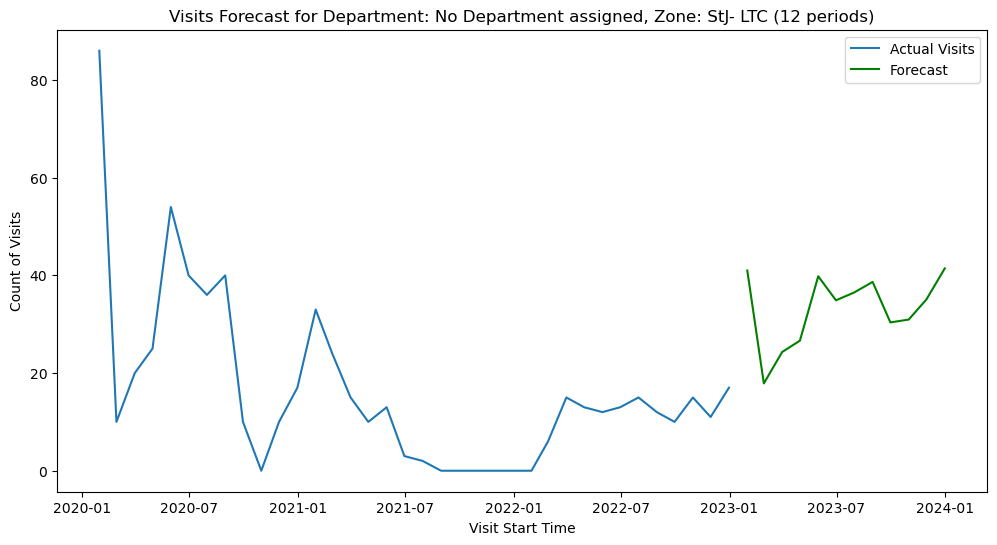

Forecasting for Department: No Department assigned, Zone: Sudbury


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


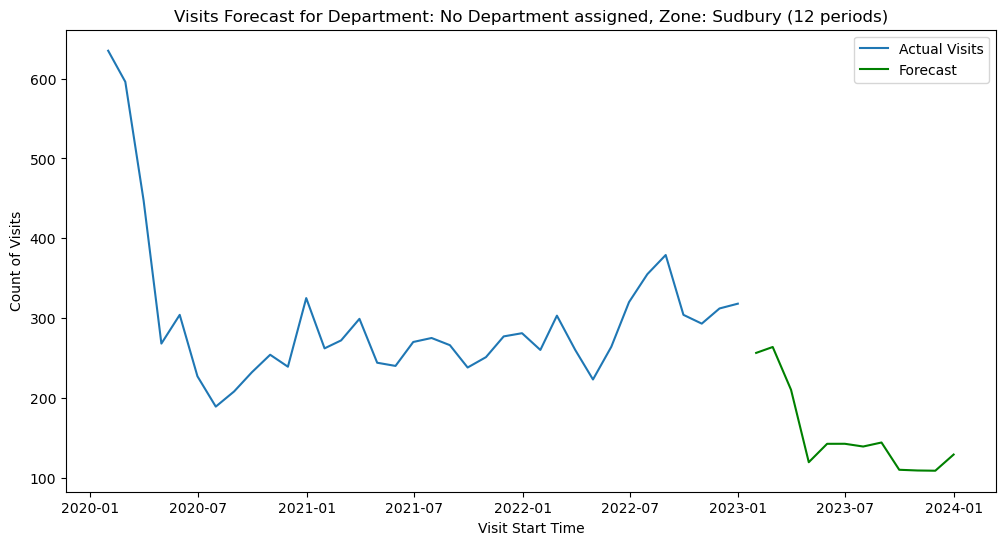

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 1


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


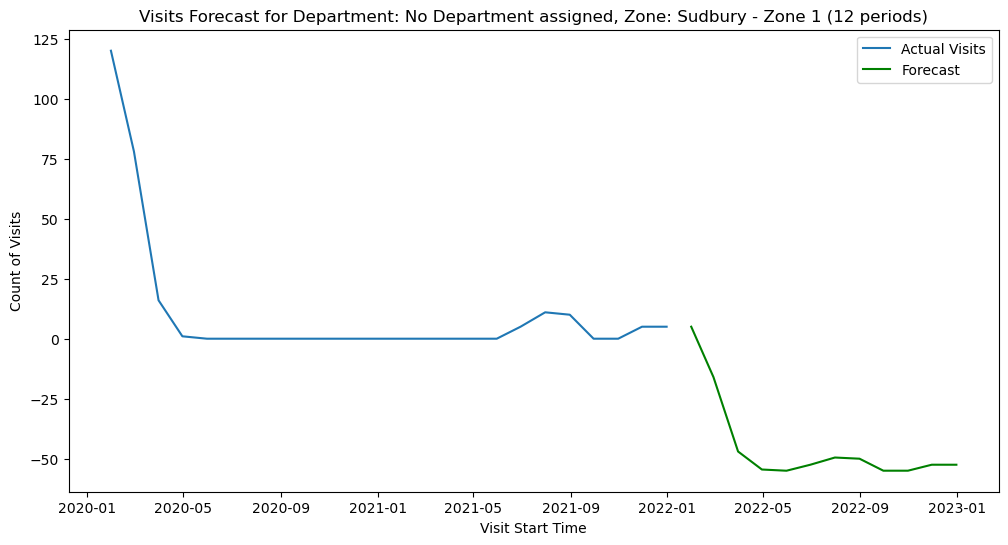

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 2


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


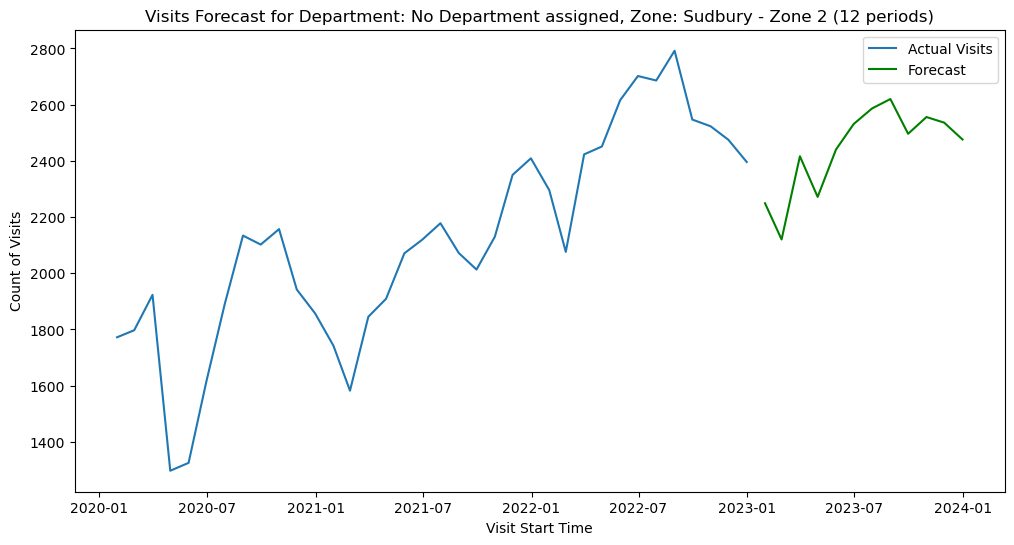

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 3


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


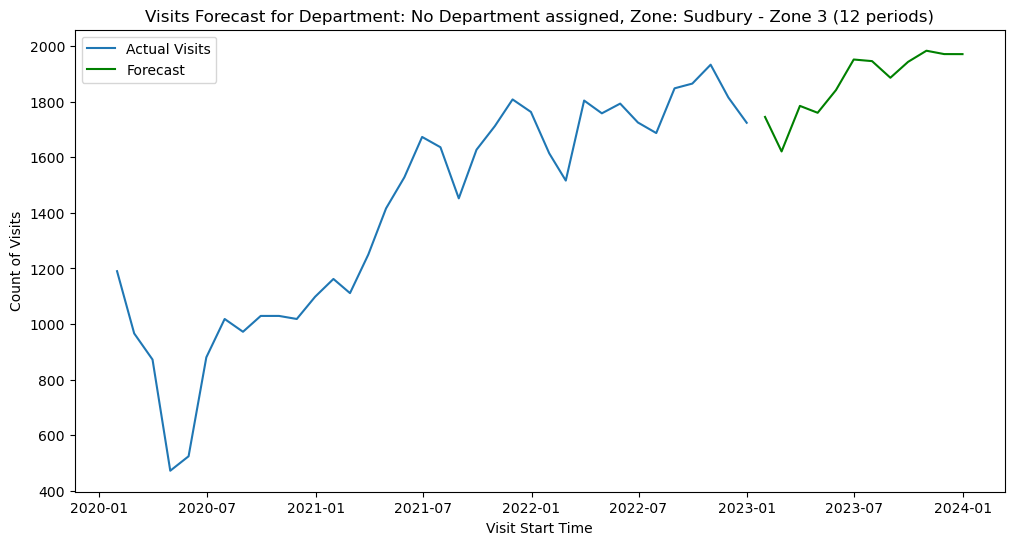

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 4


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


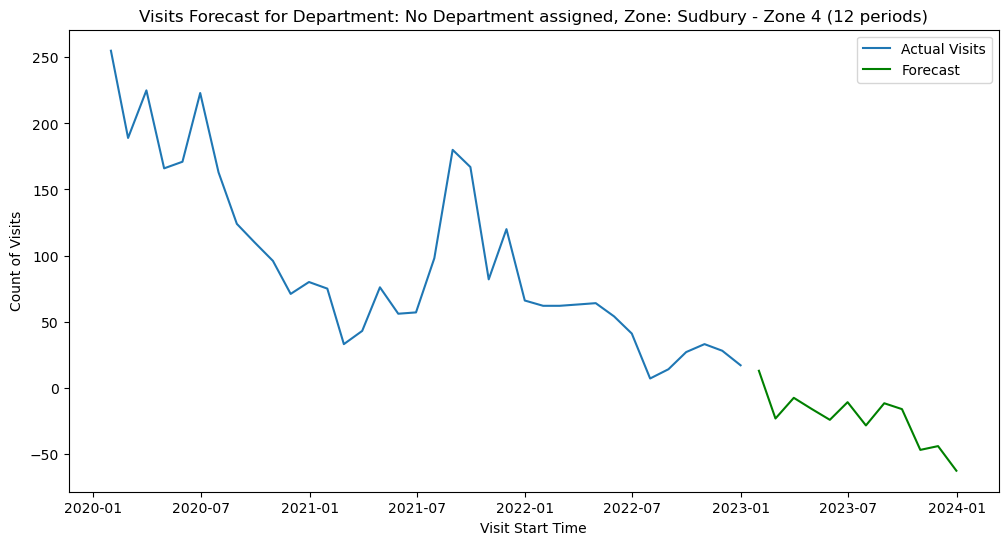

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 5


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


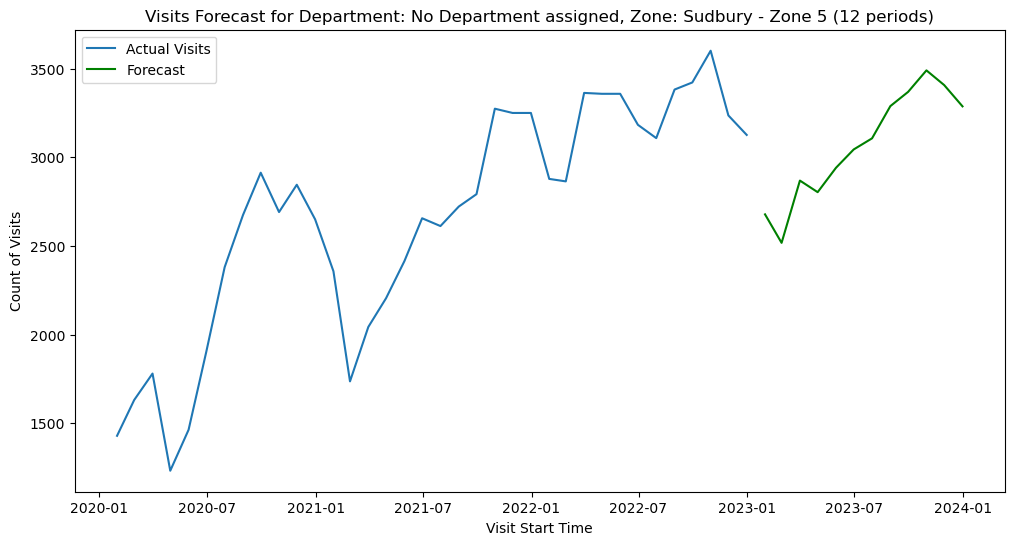

Forecasting for Department: No Department assigned, Zone: Wikwemikong
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


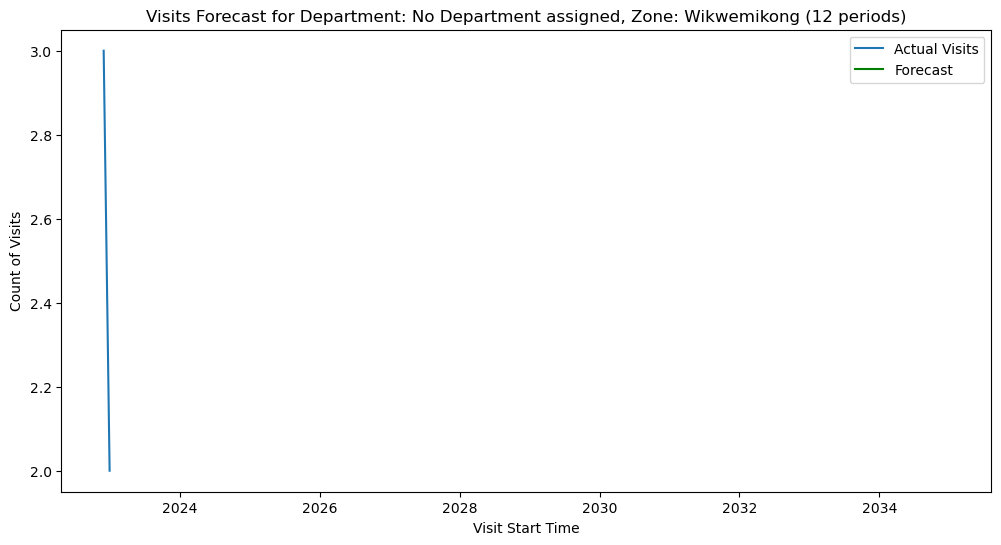

In [49]:
# Iterate over unique combinations of 'Department' and 'Zone'
for (department, zone), subset_df in merged_df.groupby(['Department', 'Zone']):
    print(f"Forecasting for Department: {department}, Zone: {zone}")

    # Forecast for monthly visits
    monthly_forecast = holt_winters_forecast(subset_df.resample('M').size(), 12, department, zone)


Forecasting for Department: Home Care, Zone: Unknown Zone


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


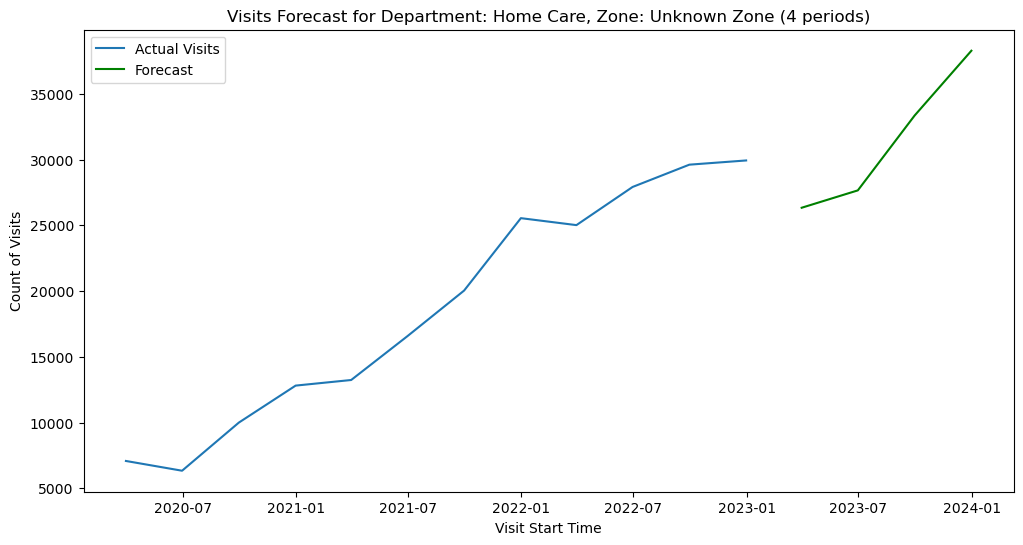

Forecasting for Department: Mental Health, Zone: Unknown Zone


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


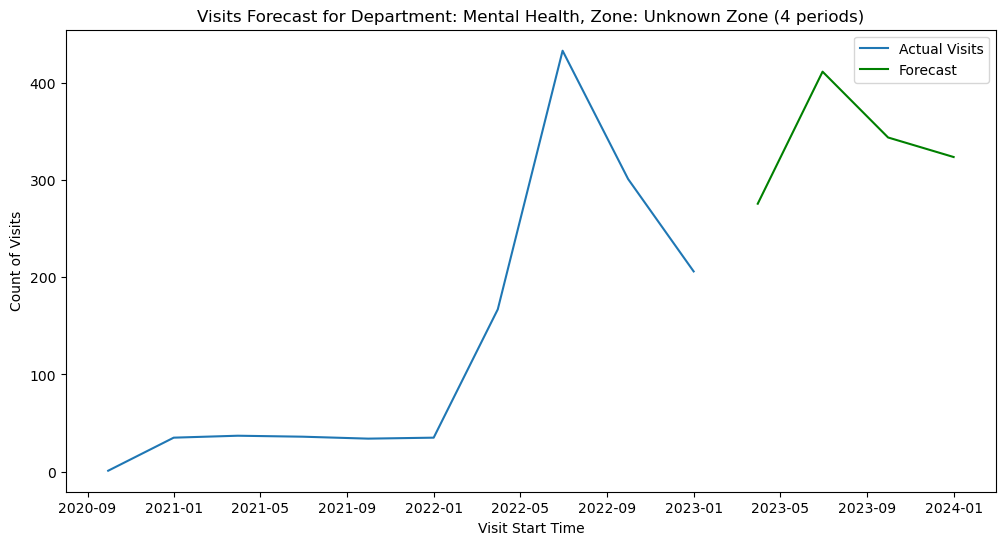

Forecasting for Department: No Department assigned, Zone: Elliot Lake


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


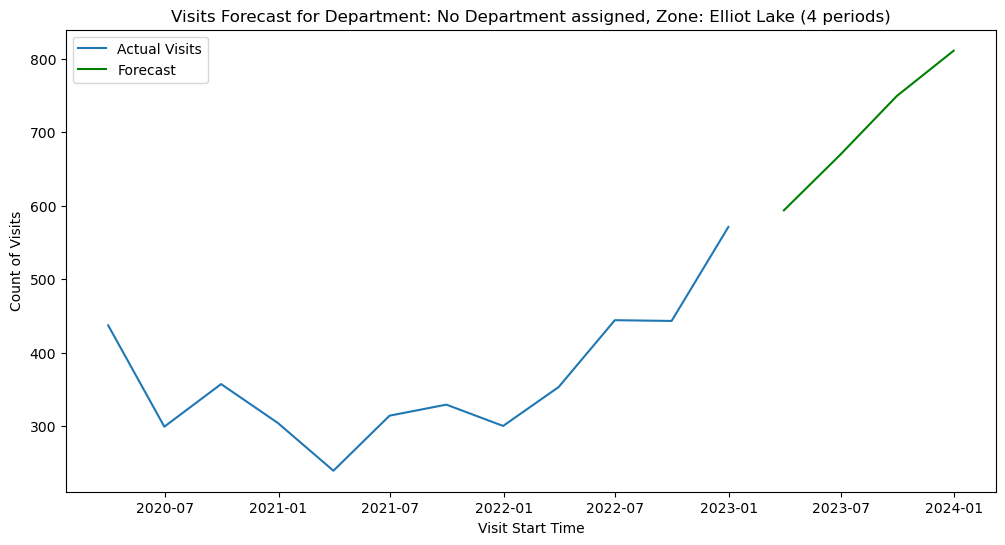

Forecasting for Department: No Department assigned, Zone: HRH


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


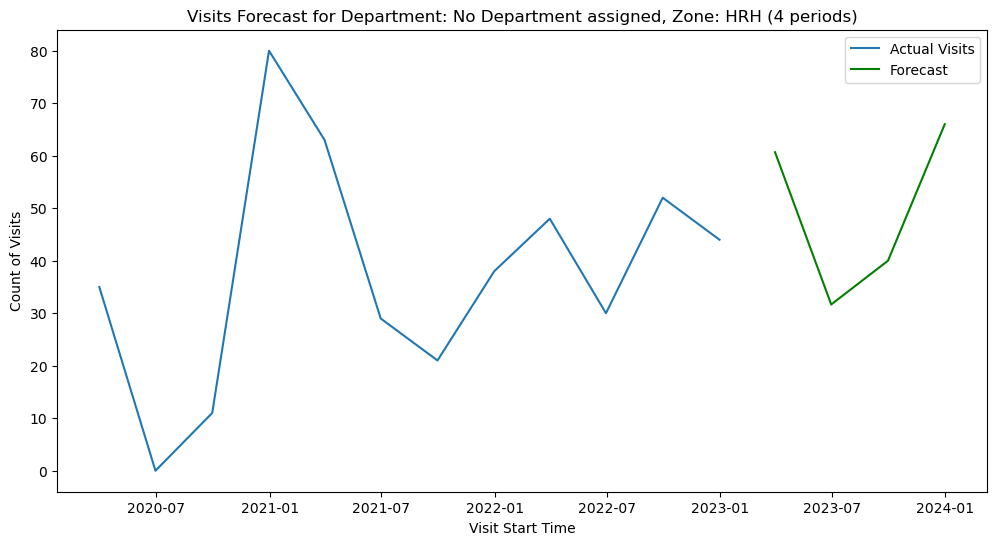

Forecasting for Department: No Department assigned, Zone: INTAKE
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


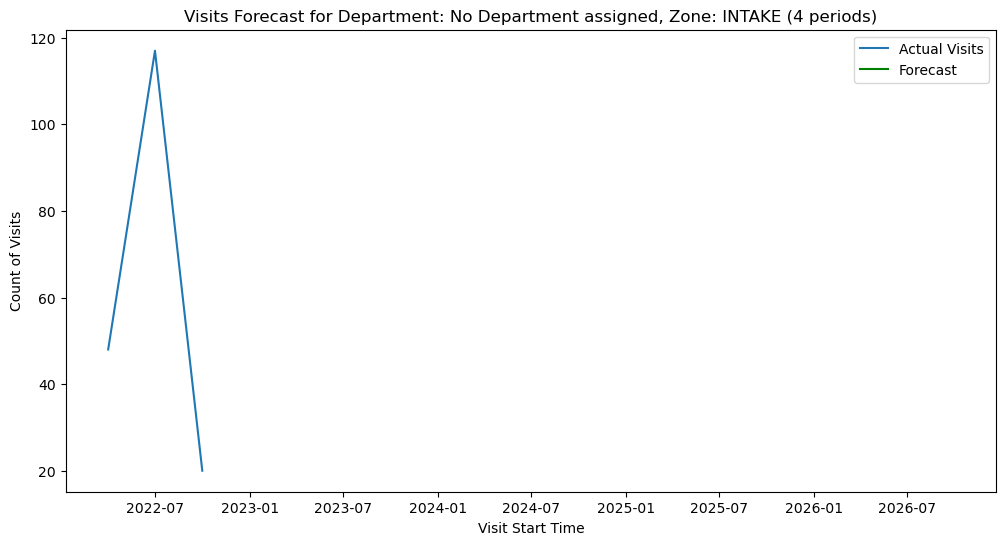

Forecasting for Department: No Department assigned, Zone: North Bay


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


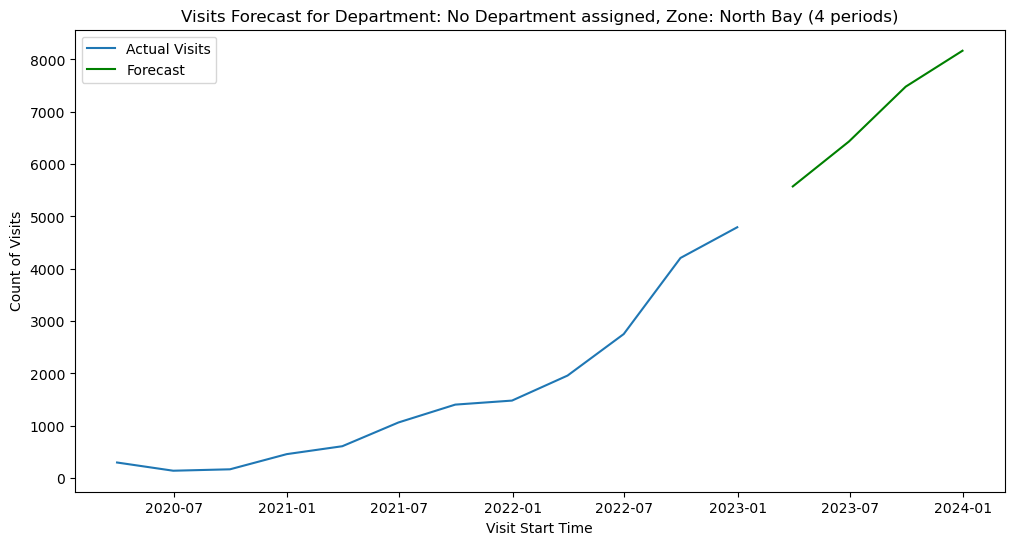

Forecasting for Department: No Department assigned, Zone: Off The Street


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


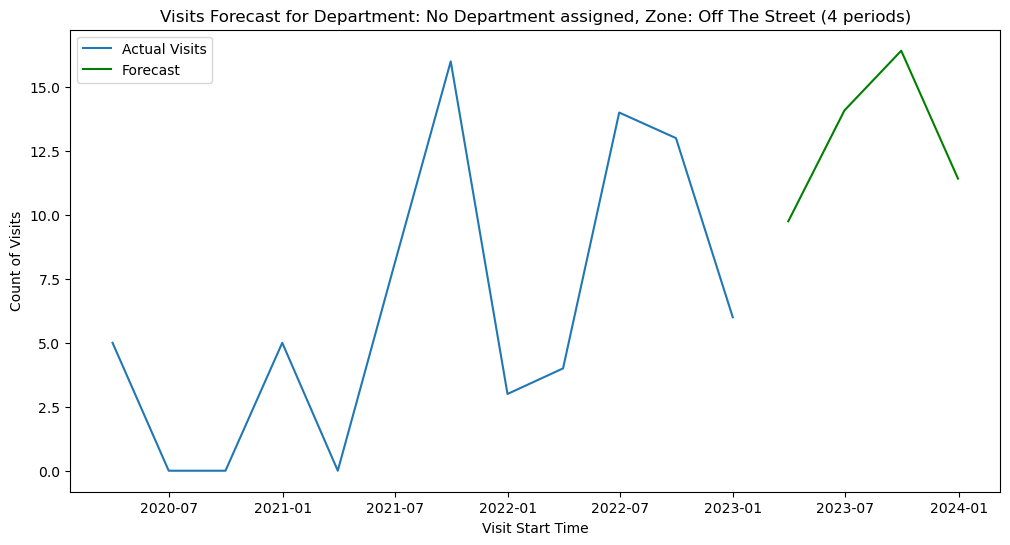

Forecasting for Department: No Department assigned, Zone: Parry Sound
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


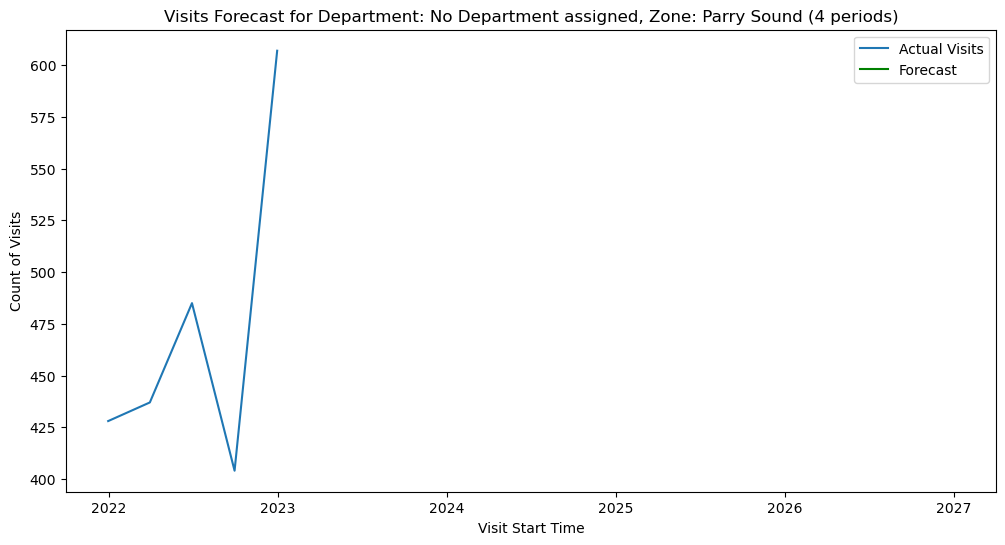

Forecasting for Department: No Department assigned, Zone: SDMA


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


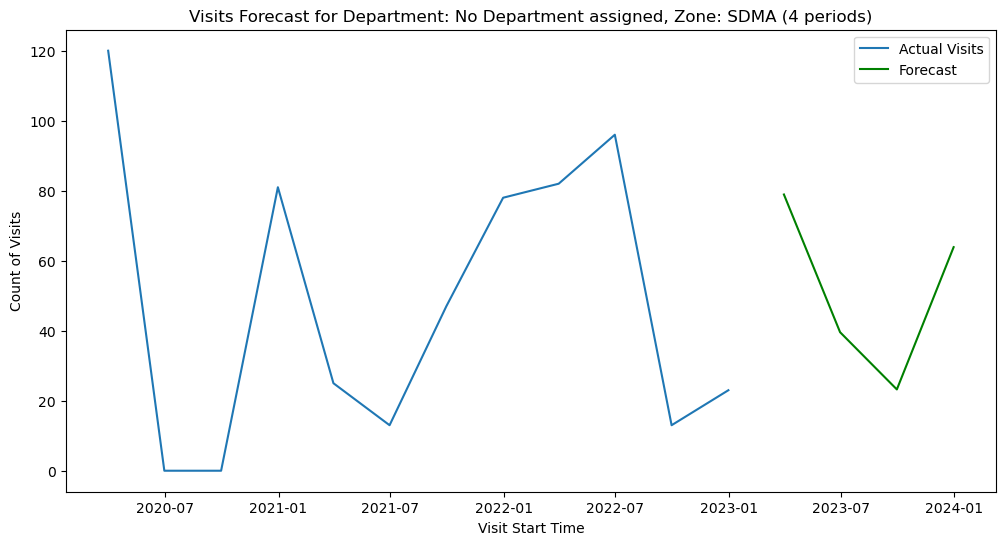

Forecasting for Department: No Department assigned, Zone: StG - LTC


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


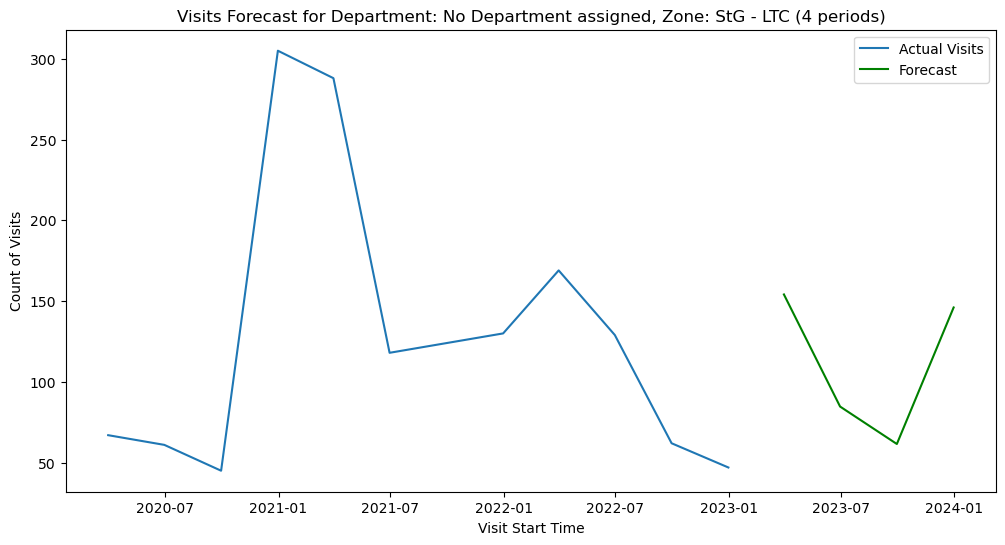

Forecasting for Department: No Department assigned, Zone: StJ- LTC


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


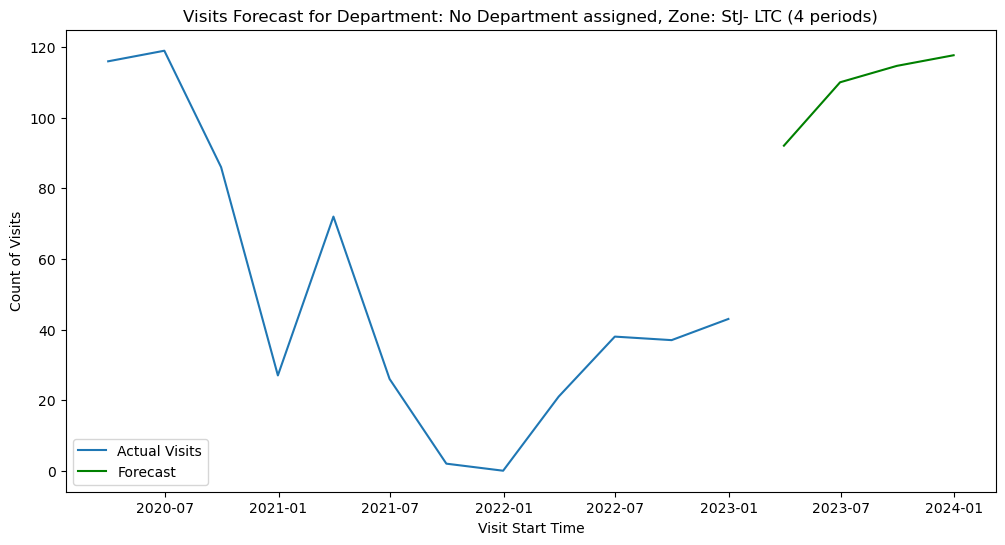

Forecasting for Department: No Department assigned, Zone: Sudbury


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


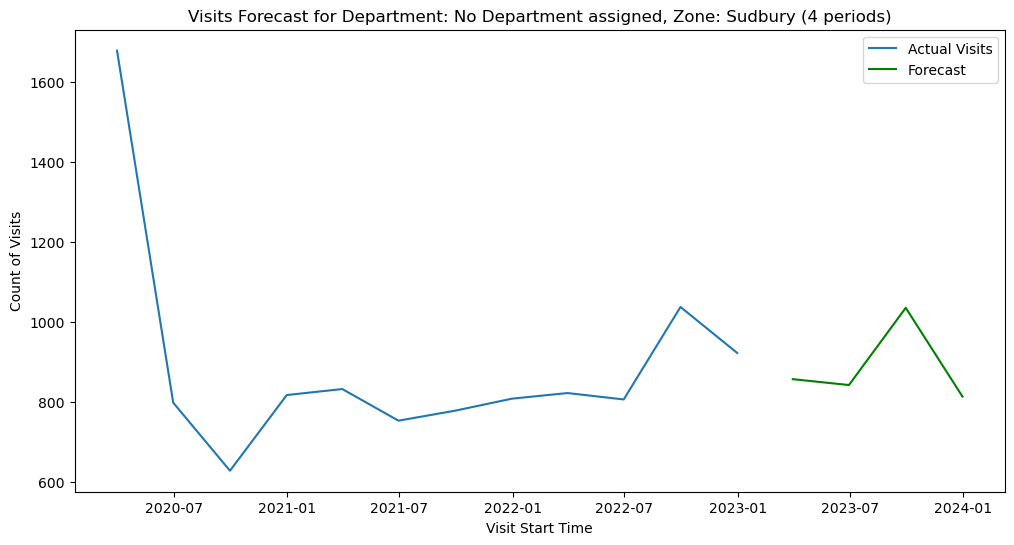

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 1


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


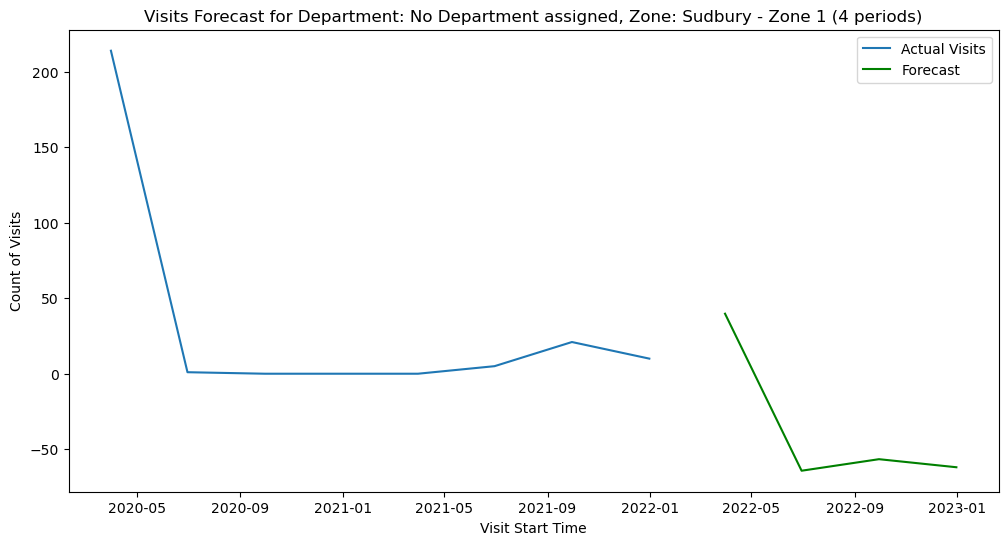

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 2


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


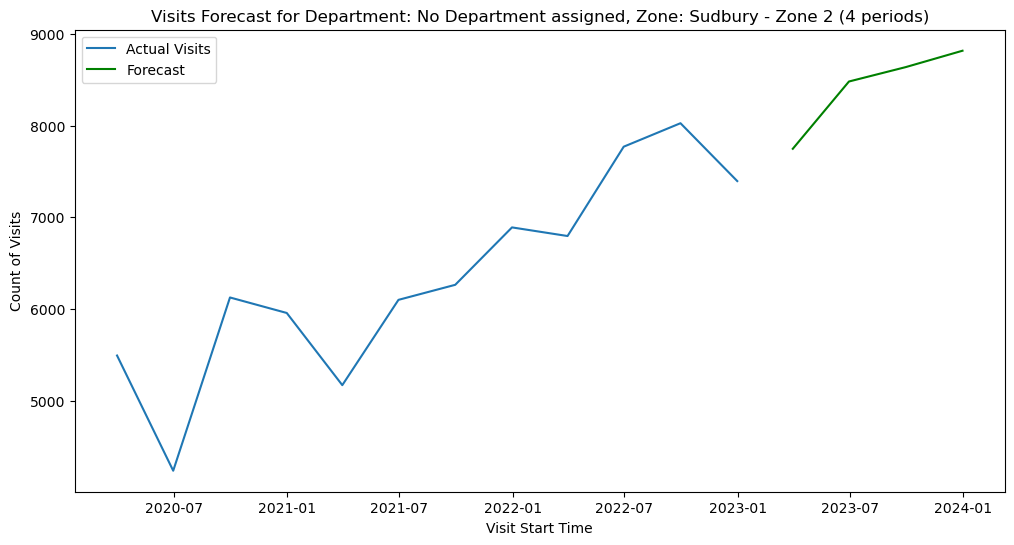

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 3


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


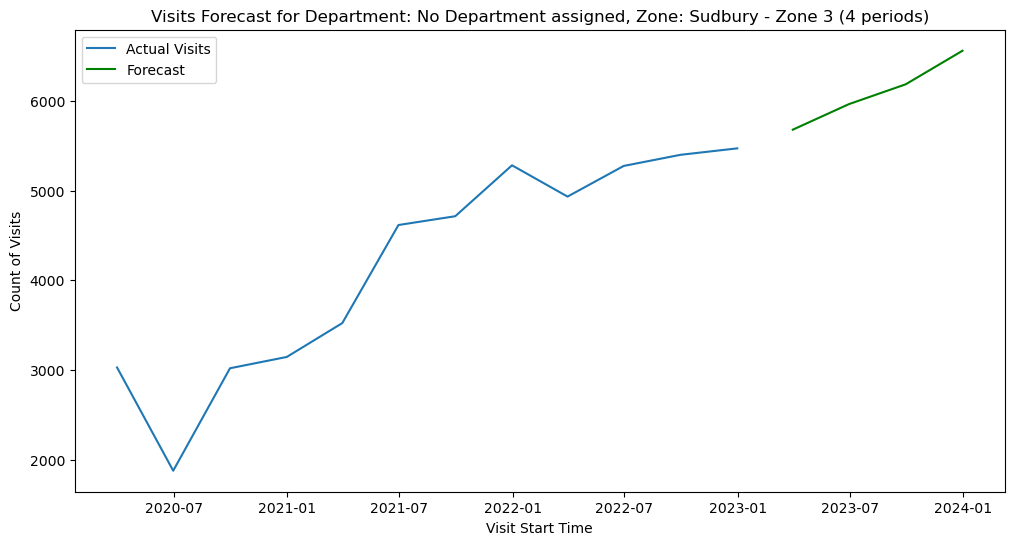

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 4


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


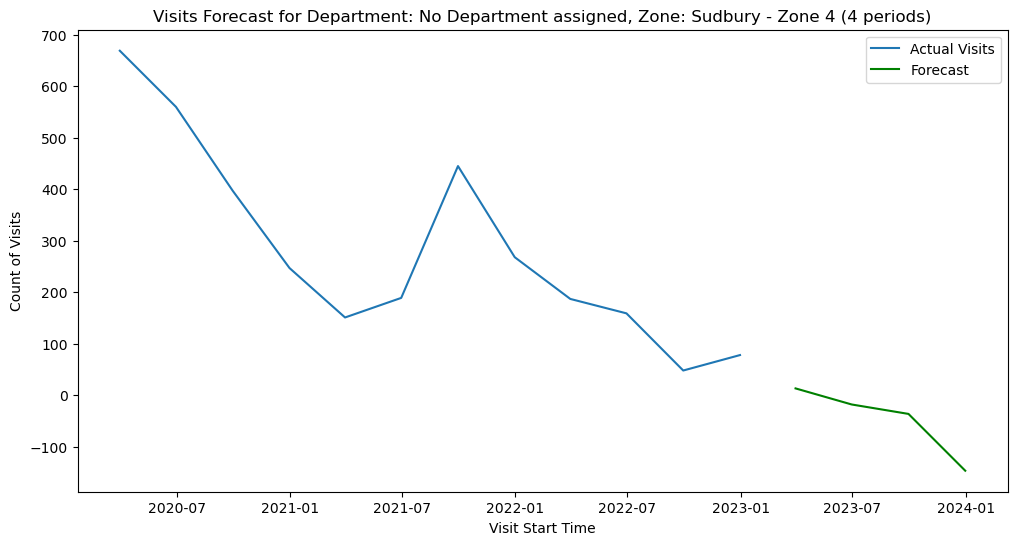

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 5


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


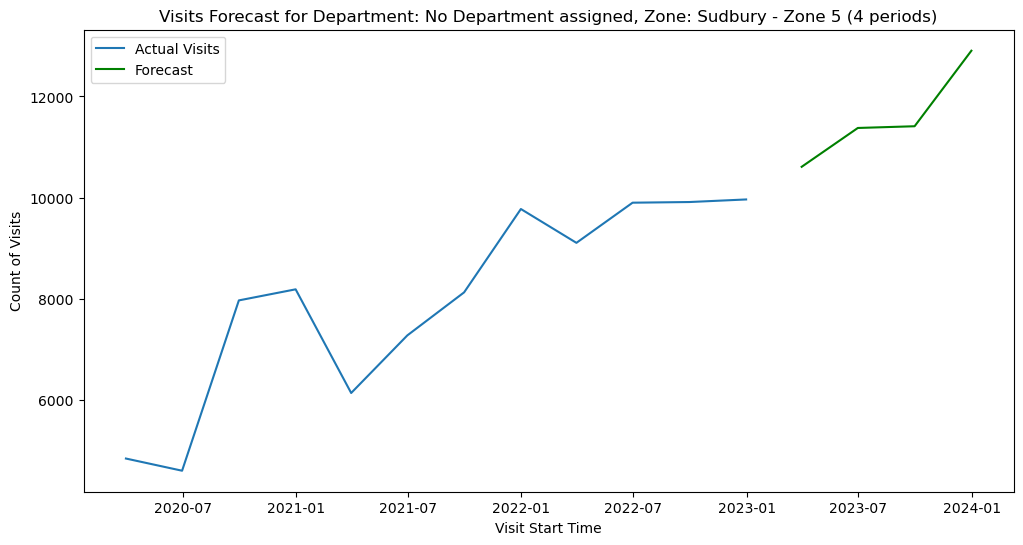

Forecasting for Department: No Department assigned, Zone: Wikwemikong
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


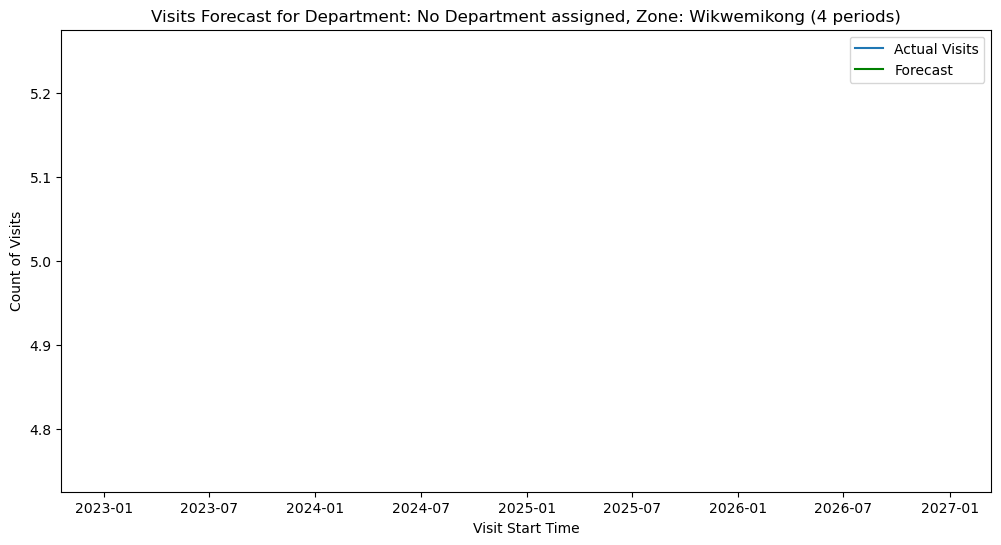

In [50]:
# Iterate over unique combinations of 'Department' and 'Zone'
for (department, zone), subset_df in merged_df.groupby(['Department', 'Zone']):
    print(f"Forecasting for Department: {department}, Zone: {zone}")
    
    # Forecast for quarterly visits
    quarterly_forecast = holt_winters_forecast(subset_df.resample('Q').size(), 4, department, zone)

Forecasting for Department: Home Care, Zone: Unknown Zone


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


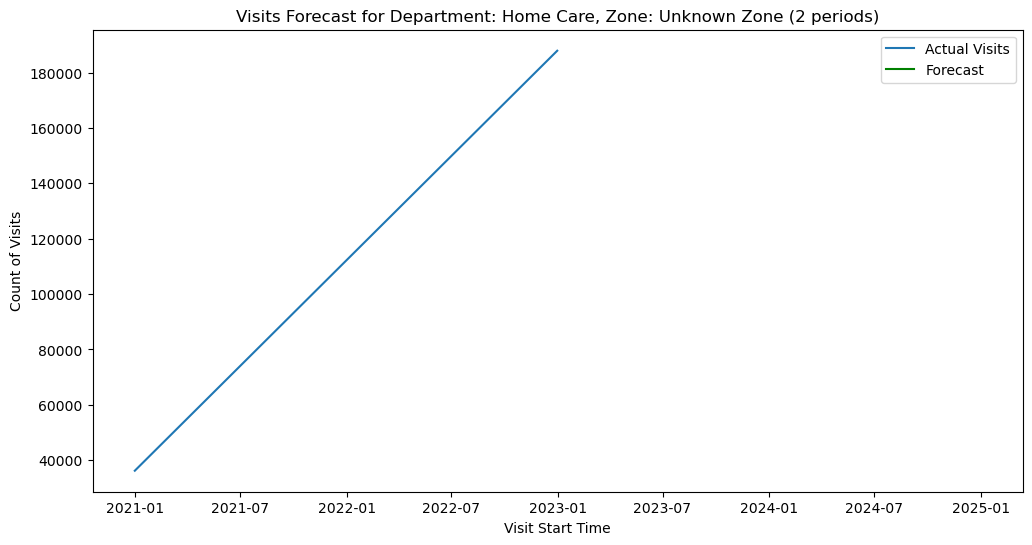

Forecasting for Department: Mental Health, Zone: Unknown Zone
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


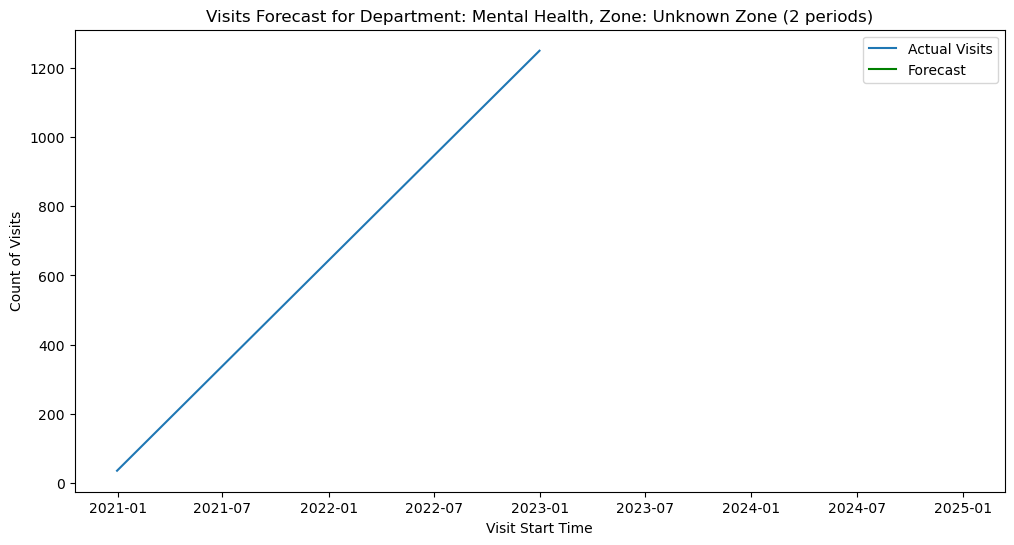

Forecasting for Department: No Department assigned, Zone: Elliot Lake
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


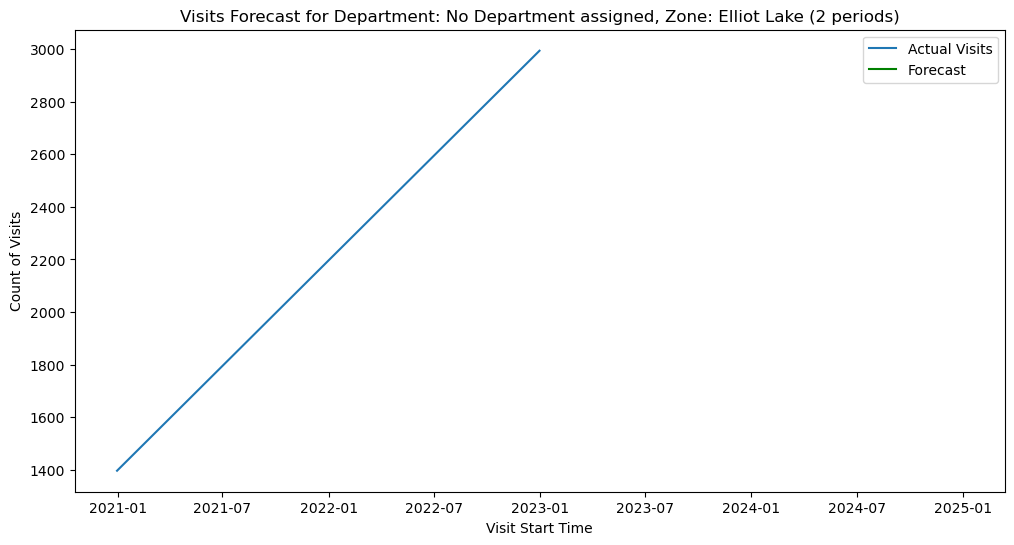

Forecasting for Department: No Department assigned, Zone: HRH
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


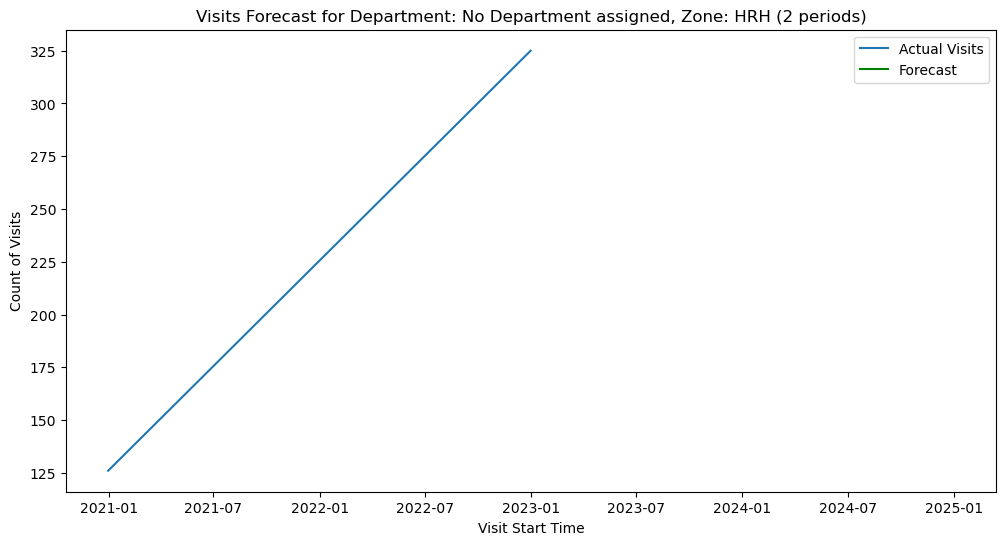

Forecasting for Department: No Department assigned, Zone: INTAKE
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


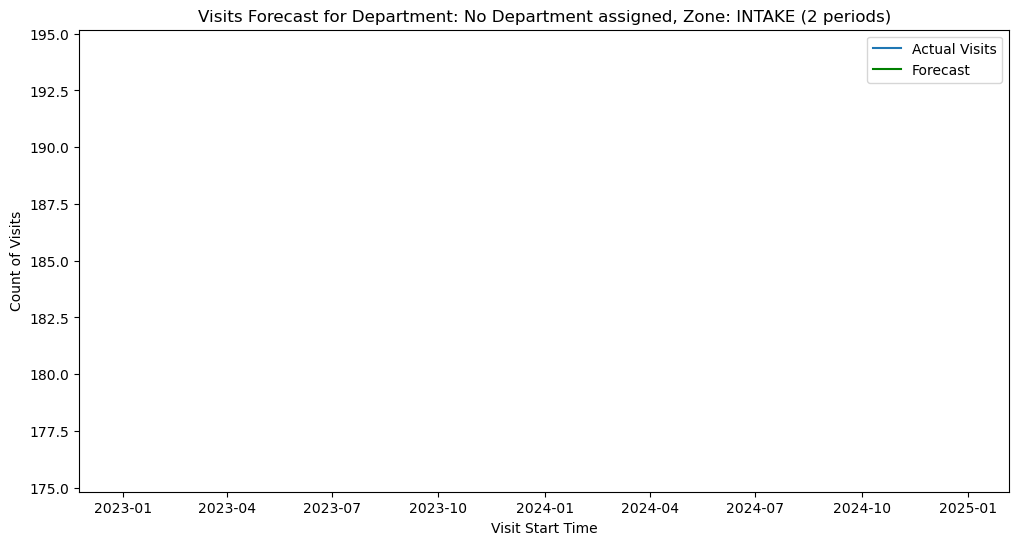

Forecasting for Department: No Department assigned, Zone: North Bay
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


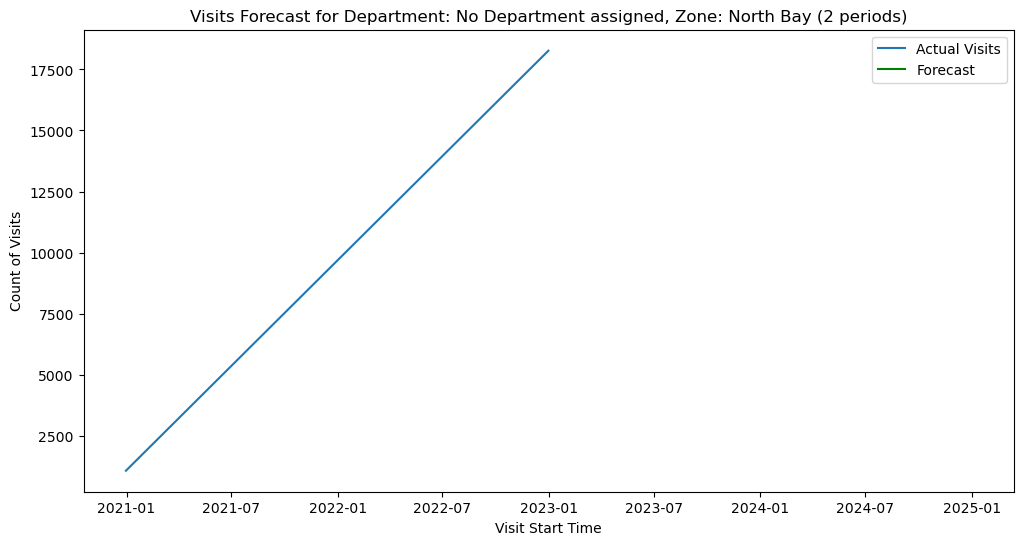

Forecasting for Department: No Department assigned, Zone: Off The Street
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


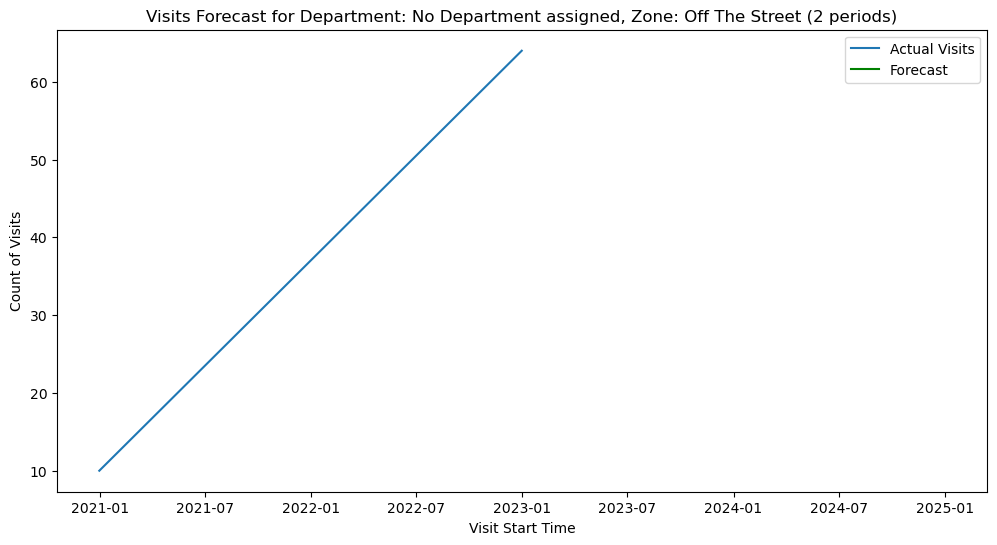

Forecasting for Department: No Department assigned, Zone: Parry Sound
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


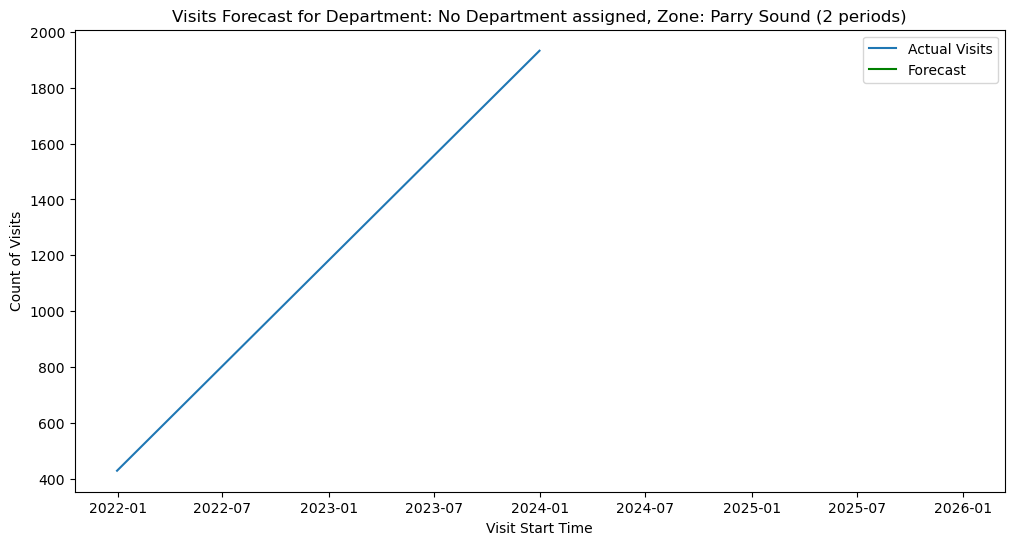

Forecasting for Department: No Department assigned, Zone: SDMA
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


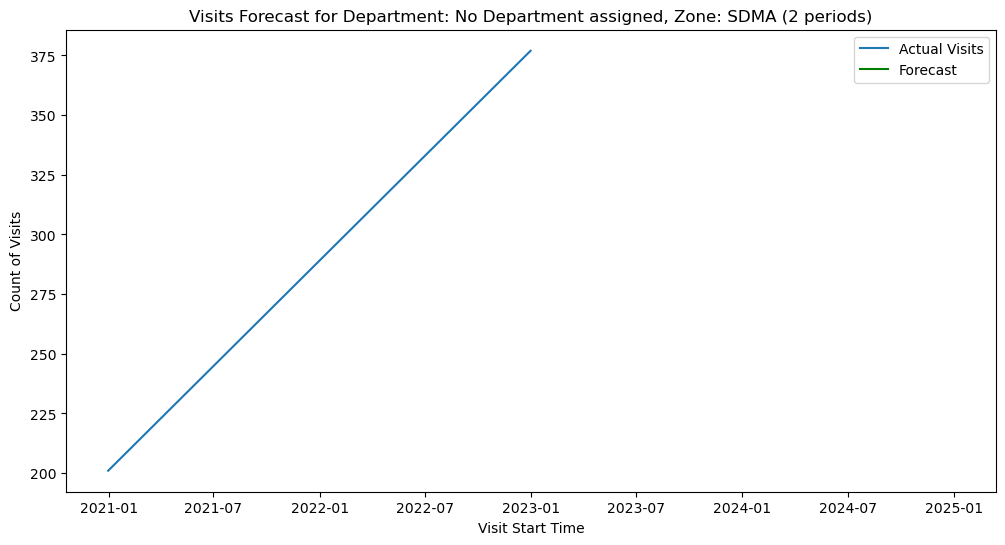

Forecasting for Department: No Department assigned, Zone: StG - LTC
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


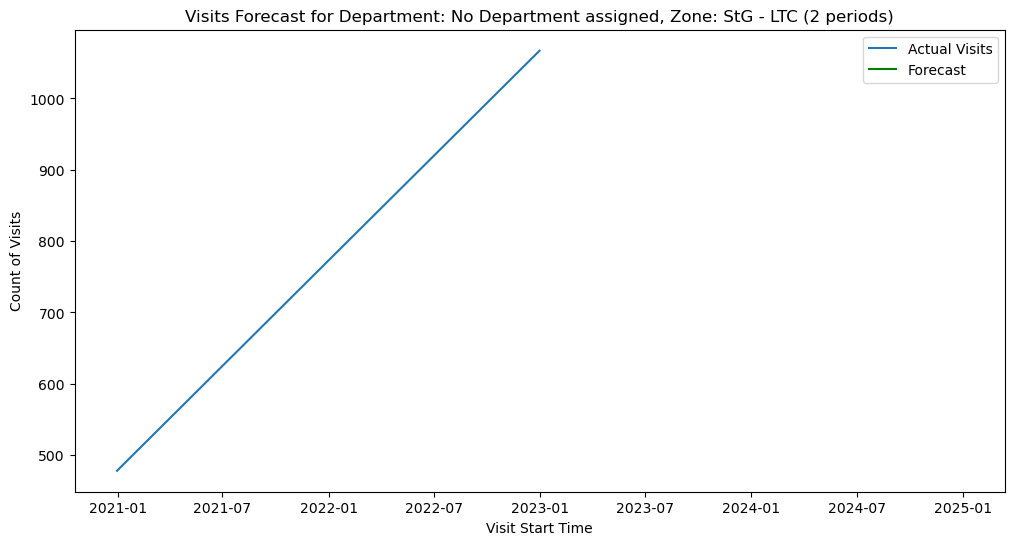

Forecasting for Department: No Department assigned, Zone: StJ- LTC
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


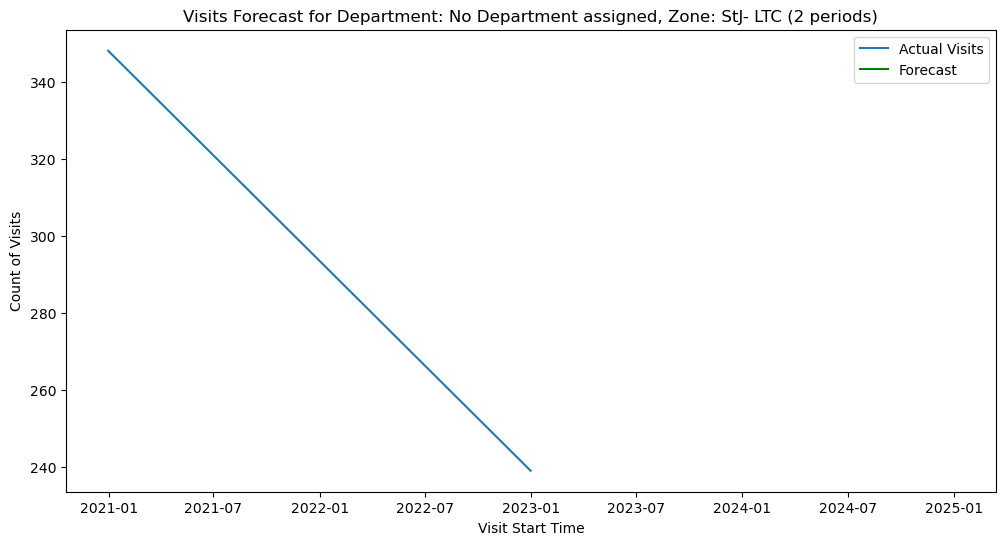

Forecasting for Department: No Department assigned, Zone: Sudbury
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


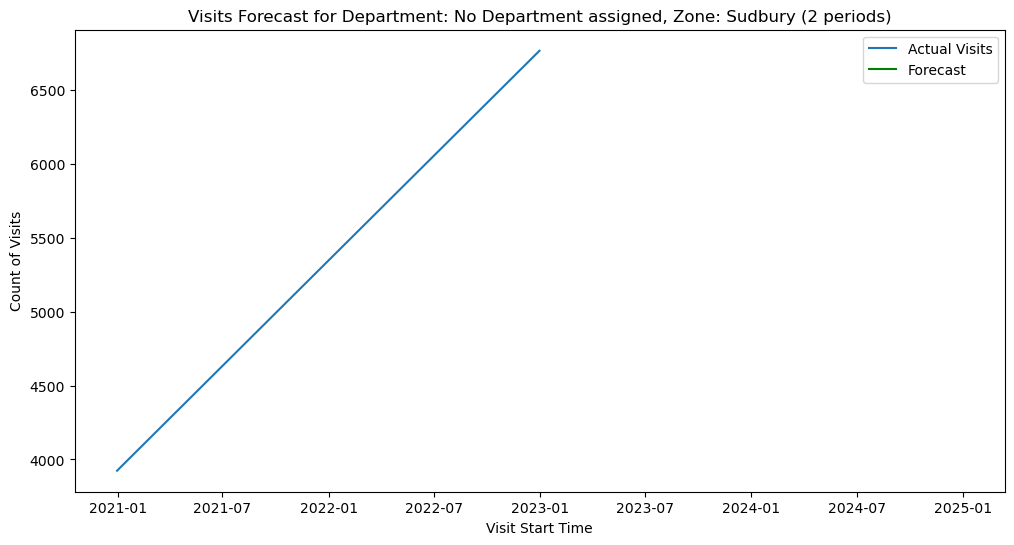

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 1
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


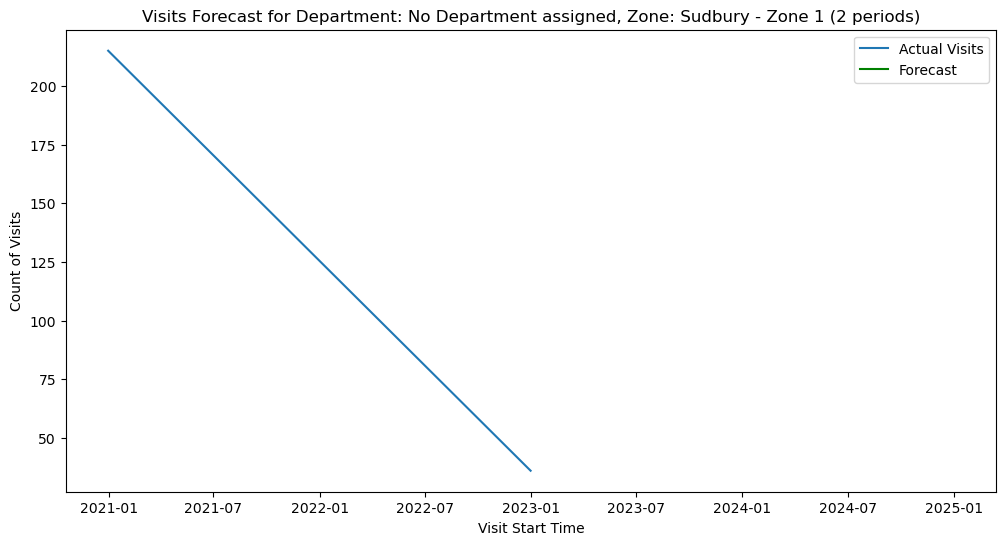

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 2
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


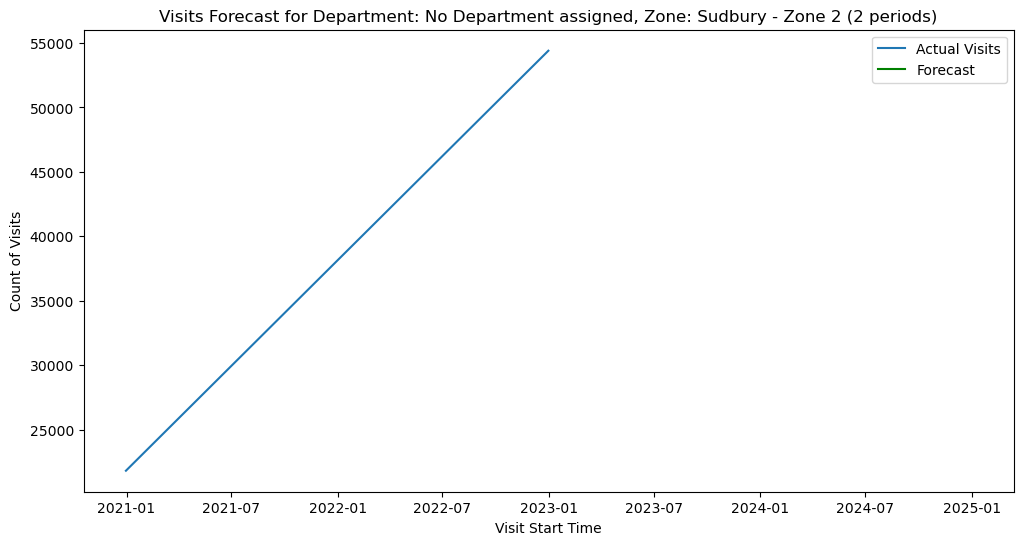

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 3
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


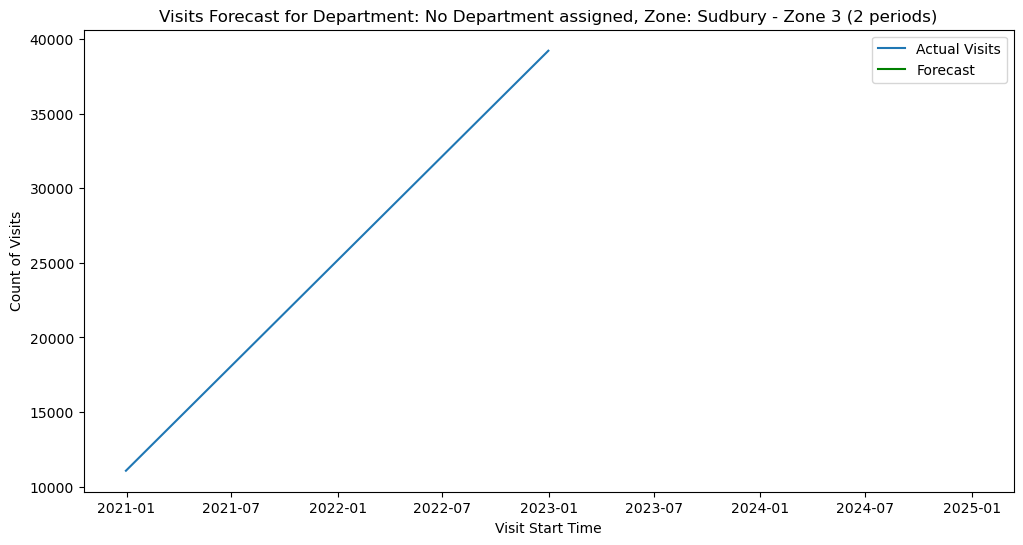

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 4
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


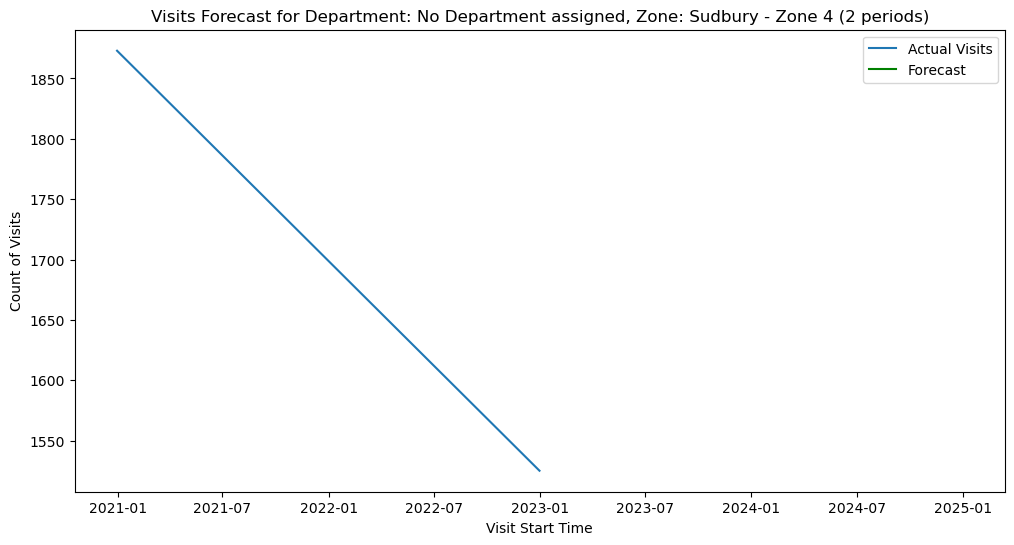

Forecasting for Department: No Department assigned, Zone: Sudbury - Zone 5
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


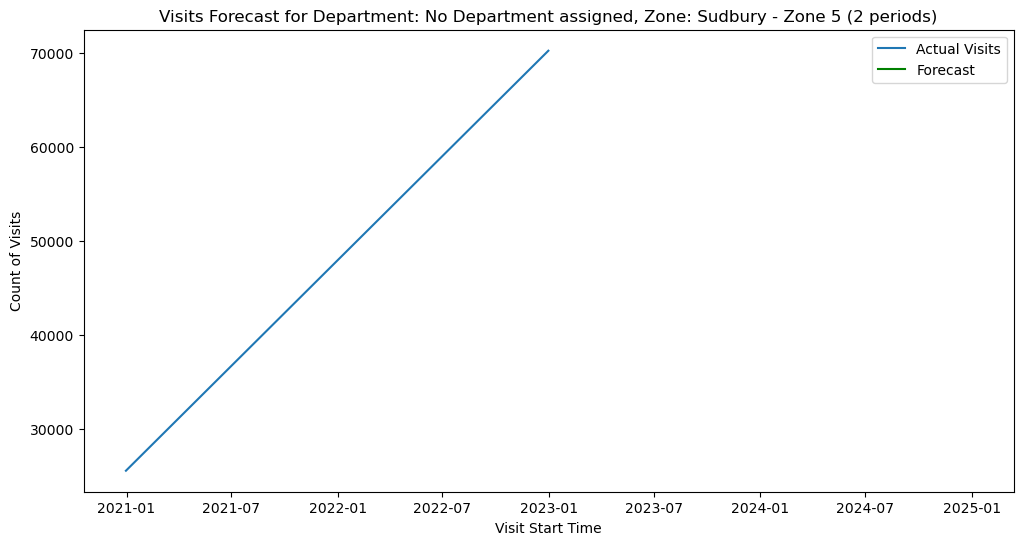

Forecasting for Department: No Department assigned, Zone: Wikwemikong
Error: Cannot compute initial seasonals using heuristic method with less than two full seasonal cycles in the data.
Using mean for the forecast.


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


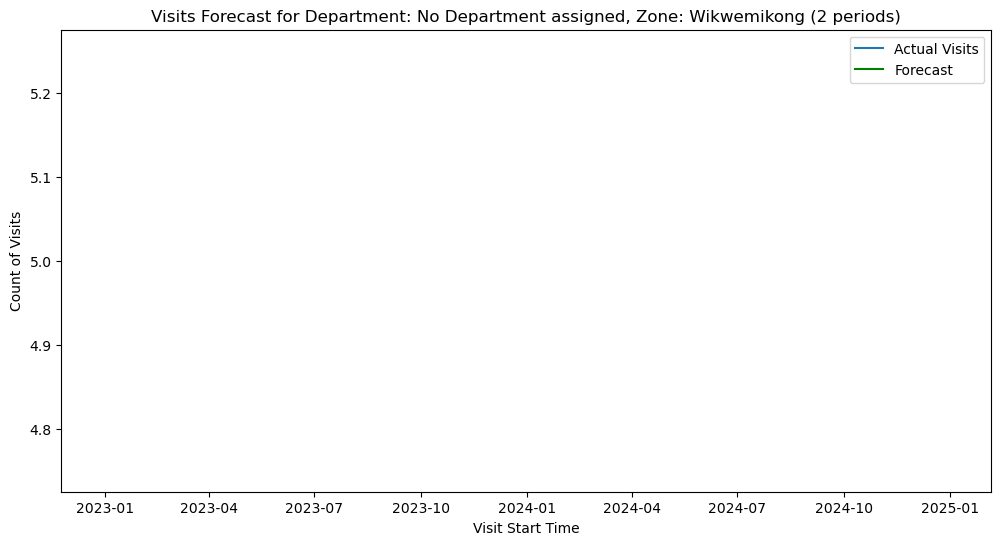

In [51]:
# Iterate over unique combinations of 'Department' and 'Zone'
for (department, zone), subset_df in merged_df.groupby(['Department', 'Zone']):
    print(f"Forecasting for Department: {department}, Zone: {zone}")
    
    # Forecast for yearly visits
    yearly_forecast = holt_winters_forecast(subset_df.resample('2Y').size(), 2, department, zone)
    

In [52]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_true, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 14.38
Root Mean Squared Error (RMSE): 21.09
